# AutoInt+Movie

- 10. Îî•Îü¨Îãù Í∏∞Î∞ò Ï∂îÏ≤ú ÏãúÏä§ÌÖú - ÎÇòÎßåÏùò Îî•Îü¨Îãù Í∏∞Î∞ò Ï∂îÏ≤ú ÏãúÏä§ÌÖú Íµ¨Ï∂ïÌïòÍ∏∞

In [1]:
# !mkdir -p ./aiffel/autoint && wget -O ./aiffel/autoint/ml-1m.zip https://files.grouplens.org/datasets/movielens/ml-1m.zip

In [2]:
# !ls ./aiffel/autoint

In [3]:
# !unzip ./aiffel/autoint/ml-1m.zip -d ./aiffel/autoint

In [2]:
# ÎùºÏù¥Î∏åÎü¨Î¶¨ Ìò∏Ï∂ú
import re 
import pandas as pd
# import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
plt.rc('font', family='NanumMyeongjo')

In [3]:
user_colums = ['user_id', 'gender', 'age', 'occupation', 'zip']
rating_columns = ['user_id', 'movie_id', 'rating', 'timestamp']
movie_columns = ['movie_id', 'title', 'genres']

In [4]:
data_path = './aiffel/autoint/ml-1m'

In [5]:
# Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨ÏòµÎãàÎã§.
users = pd.read_csv(f'{data_path}/users.dat', sep='::', header=None, names=user_colums, engine='python')
ratings = pd.read_csv(f'{data_path}/ratings.dat', sep='::', header=None, names=rating_columns, engine='python')
movies = pd.read_csv(f'{data_path}/movies.dat', sep='::', header=None, names=movie_columns, engine='python', encoding='latin-1')

## 2. Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÌïòÍ∏∞

### 1. Îç∞Ïù¥ÌÑ∞ users: user Ï†ïÎ≥¥

ÏÇ¨Ïö©Ïûê Ï†ïÎ≥¥Îäî user_id, gender, age, occupation, zip Ï†ïÎ≥¥Î°ú Íµ¨ÏÑ±ÎêòÏñ¥ ÏûàÏäµÎãàÎã§.

- user_id: 1Î∂ÄÌÑ∞ 6040ÏúºÎ°ú, ÏùµÎ™ÖÏùò Ï†ïÎ≥¥Î°ú ÎêòÏñ¥ ÏûàÏùå
- gender: M or F
- age: 18ÏÑ∏ Ïù¥ÌïòÎäî 1, 18 ~ 24ÏÑ∏Îäî 18, 25 ~ 34Îäî 25 Îì±Í≥º Í∞ôÏù¥ Íµ¨ÏÑ±ÎêòÏñ¥ ÏûàÏùå
- occupation: 2Îäî artist, 8ÏùÄ farmer Îì±ÏúºÎ°ú Ïà´ÏûêÍ∞íÏúºÎ°ú Îß§ÌïëÎêòÏñ¥ ÏûàÏùå

In [8]:
print(users.shape)
users.head()

(6040, 5)


user_id gender  age  occupation    zip
0        1      F    1          10  48067
1        2      M   56          16  70072
2        3      M   25          15  55117
3        4      M   45           7  02460
4        5      M   25          20  55455

### 2. Îç∞Ïù¥ÌÑ∞ ratings: rating Ï†ïÎ≥¥
ÏÇ¨Ïö©ÏûêÏùò ÌèâÏ†êÏù¥ Îã¥Í≤® ÏûàÎäî Îç∞Ïù¥ÌÑ∞ÏûÖÎãàÎã§. ÏïÑÎûòÏôÄ Í∞ôÏù¥ Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ÄÏû•ÎêòÏñ¥ ÏûàÏäµÎãàÎã§.

- user_id, movie_id, rating, timestamp Ïª¨ÎüºÏúºÎ°ú Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû•
    - user_id: 1Î∂ÄÌÑ∞ 6040ÏúºÎ°ú, ÏùµÎ™ÖÏùò Ï†ïÎ≥¥Î°ú ÎêòÏñ¥ ÏûàÏùå
    - movie_id: 1Î∂ÄÌÑ∞ 3952Î°ú, ÏùµÎ™ÖÏùò Ï†ïÎ≥¥Î°ú ÎêòÏñ¥ ÏûàÏùå
    - rating: 5Ï†ê ÌèâÏ†ê
    - timestamp: Unix timestampÎ°ú ÎêòÏñ¥ ÏûàÏùå.

In [9]:
print(ratings.shape)
ratings.head()

(1000209, 4)


user_id  movie_id  rating  timestamp
0        1      1193       5  978300760
1        1       661       3  978302109
2        1       914       3  978301968
3        1      3408       4  978300275
4        1      2355       5  978824291

### 3. Îç∞Ïù¥ÌÑ∞ movies: movie Ï†ïÎ≥¥
ÏòÅÌôî Ï†ïÎ≥¥Í∞Ä Îã¥Í≤®Ï†∏ ÏûàÎäî Îç∞Ïù¥ÌÑ∞ÏûÖÎãàÎã§. ÏïÑÎûòÏôÄ Í∞ôÏù¥ Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ÄÏû•ÎêòÏñ¥ ÏûàÏäµÎãàÎã§.

- movie_id title, genres Ïª¨ÎüºÏúºÎ°ú Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû•
    - movie_id : 1Î∂ÄÌÑ∞ 3952Î°ú, ÏùµÎ™ÖÏùò Ï†ïÎ≥¥Î°ú ÎêòÏñ¥ ÏûàÏùå
    - title: ÏòÅÌôî Ï†úÎ™©Í≥º Ïó∞ÎèÑÍ∞Ä Ìï®Íªò ÏûÖÎ†•ÎêòÏñ¥ ÏûàÏùå
    - genres: Action, Comedy Îì±Ïùò Ïû•Î•¥Í∞Ä ÏûÖÎ†•ÎêòÏñ¥ ÏûàÏùå

In [10]:
print(movies.shape)
movies.tail() 

(3883, 3)


movie_id                       title          genres
3878      3948     Meet the Parents (2000)          Comedy
3879      3949  Requiem for a Dream (2000)           Drama
3880      3950            Tigerland (2000)           Drama
3881      3951     Two Family House (2000)           Drama
3882      3952       Contender, The (2000)  Drama|Thriller

## 2.2 Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù
- Ï∂îÏ≤úÏãúÏä§ÌÖú Íµ¨Ï∂ïÏóê ÏïûÏÑ† ÏÇ¨Ï†Ñ Îç∞Ïù¥ÌÑ∞ Ïù¥Ìï¥
- Îç∞Ïù¥ÌÑ∞Í∞Ä Î∞îÎùºÎäî Î∞©Ìñ•(Î∂ÑÎ•ò or Ï†êÏàòÏòàÏ∏°), ÌäπÏßï(Ìé∏Ìñ• Ïó¨Î∂Ä) Îì± ÌååÏïÖÌïòÍ≥† Î™®Îç∏ Íµ¨ÏÑ±Ìï¥Ïïº Ìï®

### 1. ÏòÅÌôî Îç∞Ïù¥ÌÑ∞(movies)

- ÏòÅÌôî Îç∞Ïù¥ÌÑ∞ÏóêÎäî ÏòÅÌôî ID(movie_id), ÏòÅÌôî Ï†úÎ™©(title), Ïû•Î•¥(genres)Ïùò Ï†ïÎ≥¥Îßå Ìè¨Ìï®Îê®
- Ï†ïÎ≥¥ Î∂ÑÎ¶¨ÌïòÏó¨ Ïó∞ÎèÑÎ≥Ñ Î∂ÑÏÑù, Ïû•Î•¥Î≥Ñ Î∂ÑÏÑù Ïã§Ìñâ


In [11]:
# Ï†úÎ™©Í≥º Ïó∞ÎèÑ Î∂ÑÎ¶¨
# Ï†ïÍ∑úÌëúÌòÑÏãù, Í¥ÑÌò∏ Ïïà Ïà´Ïûê 4Í∞ú ÎΩëÏïÑÏ£ºÏÑ∏Ïöî
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)')

In [12]:
movies.head()

movie_id                               title                        genres  \
0         1                    Toy Story (1995)   Animation|Children's|Comedy   
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy   
2         3             Grumpier Old Men (1995)                Comedy|Romance   
3         4            Waiting to Exhale (1995)                  Comedy|Drama   
4         5  Father of the Bride Part II (1995)                        Comedy   

   year  
0  1995  
1  1995  
2  1995  
3  1995  
4  1995

In [13]:
# Ïû•Î•¥ Î∂ÑÎ¶¨
#  'Animation|Children's|Comedy' : | Í∏∞Ï§Ä Ïû•Î•¥ Î∂ÑÎ¶¨
movies['genres_split'] = movies['genres'].apply(lambda x: x.split('|'))
movies_exploded = movies.explode('genres_split')
movies_exploded.head(10)

movie_id                     title                        genres  year  \
0         1          Toy Story (1995)   Animation|Children's|Comedy  1995   
0         1          Toy Story (1995)   Animation|Children's|Comedy  1995   
0         1          Toy Story (1995)   Animation|Children's|Comedy  1995   
1         2            Jumanji (1995)  Adventure|Children's|Fantasy  1995   
1         2            Jumanji (1995)  Adventure|Children's|Fantasy  1995   
1         2            Jumanji (1995)  Adventure|Children's|Fantasy  1995   
2         3   Grumpier Old Men (1995)                Comedy|Romance  1995   
2         3   Grumpier Old Men (1995)                Comedy|Romance  1995   
3         4  Waiting to Exhale (1995)                  Comedy|Drama  1995   
3         4  Waiting to Exhale (1995)                  Comedy|Drama  1995   

  genres_split  
0    Animation  
0   Children's  
0       Comedy  
1    Adventure  
1   Children's  
1      Fantasy  
2       Comedy  
2      Romance  
3       Comedy  
3        Drama

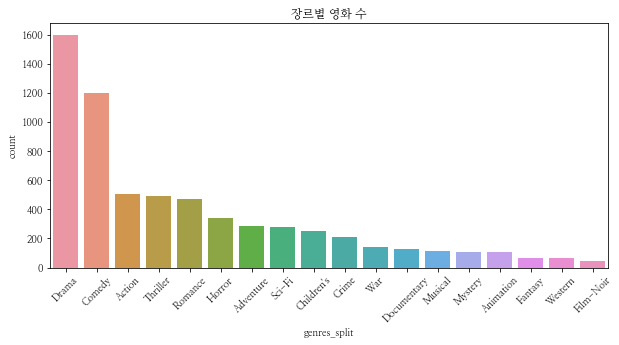

In [14]:
# Ïû•Î•¥Î≥Ñ ÏòÅÌôî Í∞úÏàò x:Ïû•Î•¥, y:Í∞úÏàò
sns.countplot(x='genres_split', data=movies_exploded, order = movies_exploded['genres_split'].value_counts().index)

plt.gcf().set_size_inches(10, 4.5)
plt.title('Ïû•Î•¥Î≥Ñ ÏòÅÌôî Ïàò')
plt.xticks(rotation=45)
plt.show()

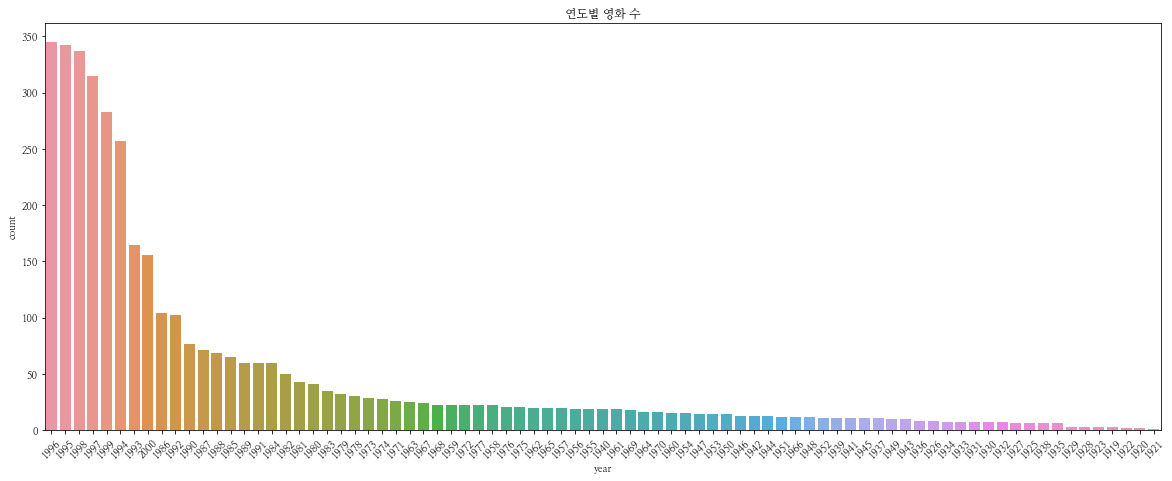

In [15]:
# Ïó∞ÎèÑÎ≥Ñ ÏòÅÌôî Í∞úÏàò x:Ïó∞ÎèÑ, y:ÏòÅÌôî Í∞úÏàò
year_counts = movies['year'].value_counts().reset_index()
year_counts.columns = ['year', 'count']

year_counts = year_counts.sort_values('count', ascending=False)

sns.barplot(x='year', y='count', data=year_counts)

plt.gcf().set_size_inches(20, 7.5)
plt.title('Ïó∞ÎèÑÎ≥Ñ ÏòÅÌôî Ïàò')
plt.xticks(rotation=45)
plt.show()

- 1995~2000ÎÖÑ ÏÇ¨Ïù¥ ÏòÅÌôîÍ∞Ä Í∞ÄÏû• ÎßéÏùå

### 2. ÌèâÏ†ê Îç∞Ïù¥ÌÑ∞(ratings)

- ÌèâÍ∑† ÌèâÏ†ê, Ïû•Î•¥Î≥Ñ ÌèâÏ†ê Îì± Îã§ÏñëÌïú Í¥ÄÏ†êÏúºÎ°ú Î∂ÑÏÑù

In [16]:
# movie_idÎ•º Í∏∞Ï§ÄÏúºÎ°ú ÌèâÏ†ê ÌèâÍ∑† : groupby
mv_rating_agg = pd.DataFrame(ratings.groupby('movie_id')['rating'].mean())
mv_rating_agg['num_of_ratings'] = pd.DataFrame(ratings.groupby('movie_id')['rating'].count())
mv_rating_agg = mv_rating_agg.reset_index()
mv_rating_agg.columns = ['movie_id', 'avg_rating', 'num_of_ratings']
mv_rating_agg

movie_id  avg_rating  num_of_ratings
0            1    4.146846            2077
1            2    3.201141             701
2            3    3.016736             478
3            4    2.729412             170
4            5    3.006757             296
...        ...         ...             ...
3701      3948    3.635731             862
3702      3949    4.115132             304
3703      3950    3.666667              54
3704      3951    3.900000              40
3705      3952    3.780928             388

[3706 rows x 3 columns]

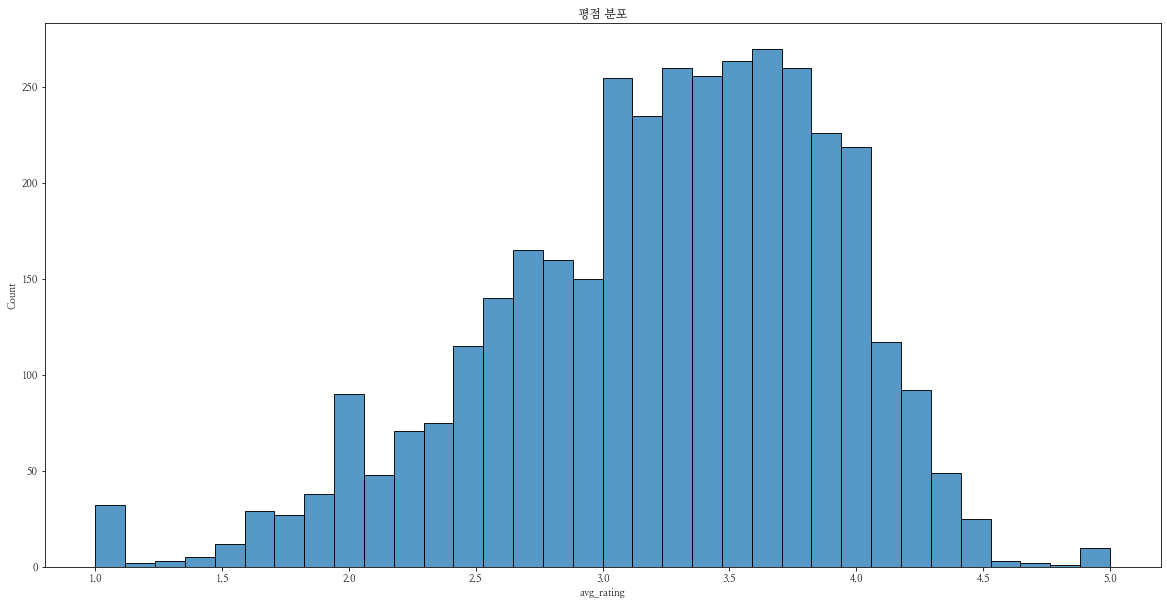

In [17]:
# ÌèâÍ∑† ÌèâÏ†êÎ≥Ñ ÏòÅÌôî Ïàò 
# x:ÌèâÍ∑†ÌèâÏ†ê, y:ÏòÅÌôî Í∞úÏàò
sns.histplot(mv_rating_agg['avg_rating'], kde=False)
plt.gcf().set_size_inches(20, 10)
plt.title('ÌèâÏ†ê Î∂ÑÌè¨')
plt.show()

- Ï†ïÍ∑ú Î∂ÑÌè¨ ÌòïÌÉúÎäî ÎÇòÏò§ÏßÄ ÏïäÏùå
- 1Ï†ê, 5Ï†ê Îß§Ïö∞ ÏûëÏùå 3.5Ï†ê Î∂ÑÌè¨Í∞Ä Í∞ÄÏû• ÎßéÏùå

### 3. Ïû•Î•¥Î≥Ñ ÌèâÏ†ê Î∂ÑÌè¨

- 'Toy Story (1995)' 3Í∞ú(Animation, Children's, Comedy)Ïùò Ïû•Î•¥
    - ÌÜ†Ïù¥Ïä§ÌÜ†Î¶¨ ÌèâÏ†ê : 4Ï†ê ‚á¢ Í∞Å Ïû•Î•¥ Ï†êÏàòÎèÑ 4Ï†êÏù¥Îùº Í∞ÄÏ†ï
      
1. ÏòÅÌôî ÌèâÏ†ê Îç∞Ïù¥ÌÑ∞ÏôÄ ÏòÅÌôî Îç∞Ïù¥ÌÑ∞Î•º Ìï©Ï≥êÏ§ÄÎã§.
2. genre_splitÎ•º Í∏∞Ï§ÄÏúºÎ°ú groupbyÌïúÎã§.
3. groupbyÌï† Îïå ratingÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÌèâÍ∑†(mean)Í≥º Í∞úÏàò(count)Î•º ÎΩëÏïÑÎÇ∏Îã§.
4. ratingÍ≥º meanÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Ï†ïÎ†¨ÌïúÎã§.

In [18]:
rating_by_genre_df = pd.merge(ratings[['movie_id', 'rating']] ,movies_exploded[['movie_id', 'genres_split']] ,on='movie_id').groupby('genres_split').agg({'rating': ['mean', 'count']}).sort_values(('rating', 'mean')).reset_index()
rating_by_genre_df

genres_split    rating        
                     mean   count
0        Horror  3.215013   76386
1    Children's  3.422035   72186
2       Fantasy  3.447371   36301
3        Sci-Fi  3.466521  157294
4     Adventure  3.477257  133953
5        Action  3.491185  257457
6        Comedy  3.522099  356580
7      Thriller  3.570466  189680
8       Romance  3.607465  147523
9       Western  3.637770   20683
10      Musical  3.665519   41533
11      Mystery  3.668102   40178
12    Animation  3.684868   43293
13        Crime  3.708679   79541
14        Drama  3.766332  354529
15          War  3.893327   68527
16  Documentary  3.933123    7910
17    Film-Noir  4.075188   18261

In [19]:
rating_by_genre_df.columns

MultiIndex([('genres_split',      ''),
            (      'rating',  'mean'),
            (      'rating', 'count')],
           )

- 'ÌèâÏ†êÏùò ÌèâÍ∑†'Í≥º 'ÌèâÏ†êÏùò Í∞úÏàò'Î•º ÎèôÏãúÏóê Íµ¨ÌïòÎã§Î≥¥Îãà 'ÌèâÏ†ê(rating)' Í∞íÏù¥ Í≤πÏπòÍ≤å ÎêòÎ©¥ÏÑú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ïù∏Îç±Ïä§ 2Í∞ú Îê®

In [20]:
for col in rating_by_genre_df.columns.values:
    if col[0] == 'rating':
        print('_'.join(col).strip())
    else:
        print(col[0])

genres_split
rating_mean
rating_count


In [21]:
rating_by_genre_df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in rating_by_genre_df.columns.values]    
rating_by_genre_df

genres_split  rating_mean  rating_count
0        Horror     3.215013         76386
1    Children's     3.422035         72186
2       Fantasy     3.447371         36301
3        Sci-Fi     3.466521        157294
4     Adventure     3.477257        133953
5        Action     3.491185        257457
6        Comedy     3.522099        356580
7      Thriller     3.570466        189680
8       Romance     3.607465        147523
9       Western     3.637770         20683
10      Musical     3.665519         41533
11      Mystery     3.668102         40178
12    Animation     3.684868         43293
13        Crime     3.708679         79541
14        Drama     3.766332        354529
15          War     3.893327         68527
16  Documentary     3.933123          7910
17    Film-Noir     4.075188         18261

- ol[0]Ïùò Í∞íÏù¥ ratingÏù¥Î©¥ _ Î•º Í∏∞Ï§ÄÏúºÎ°ú Îç∞Ïù¥ÌÑ∞Î•º Î¨∂Ïñ¥Îã¨Îùº

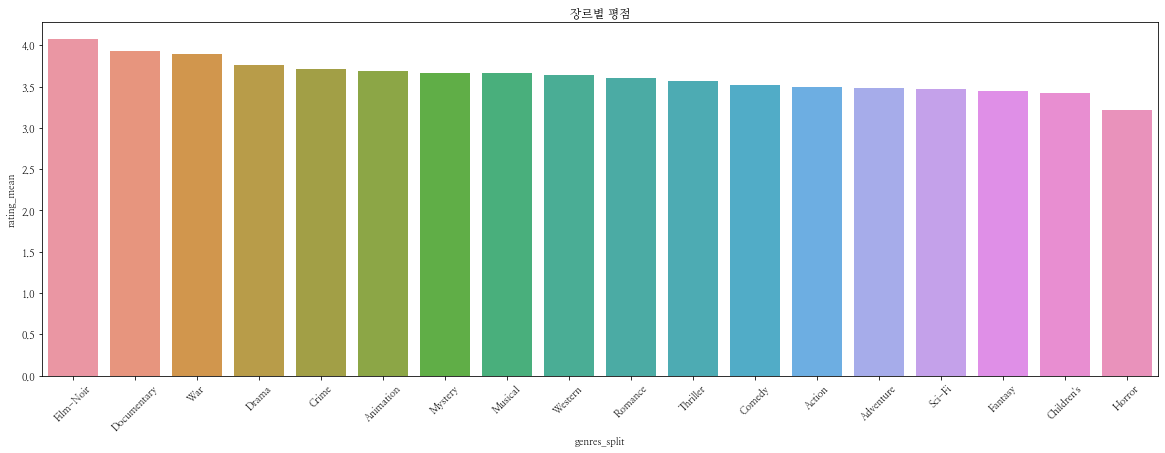

In [22]:
# Ïû•Î•¥Î≥Ñ ÌèâÏ†ê
# x:Ïû•Î•¥, y:ÌèâÍ∑† ÌèâÏ†ê
rating_by_genre_df_sorted_by_mean = rating_by_genre_df.sort_values('rating_mean', ascending=False)

plt.figure(figsize=(20, 6.5))
sns.barplot(x='genres_split', y='rating_mean', data=rating_by_genre_df_sorted_by_mean)
plt.title('Ïû•Î•¥Î≥Ñ ÌèâÏ†ê')
plt.xticks(rotation=45)
plt.show()

- ÎπÑÏä∑Ìïú ÌèâÏ†ê
- Ìò∏Îü¨Î¨ºÏùÄ Îã§Î•∏ Ïû•Î•¥Ïóê ÎπÑÌï¥ ÌèâÏ†êÏù¥ ÎÇÆÏùÄ Ìé∏

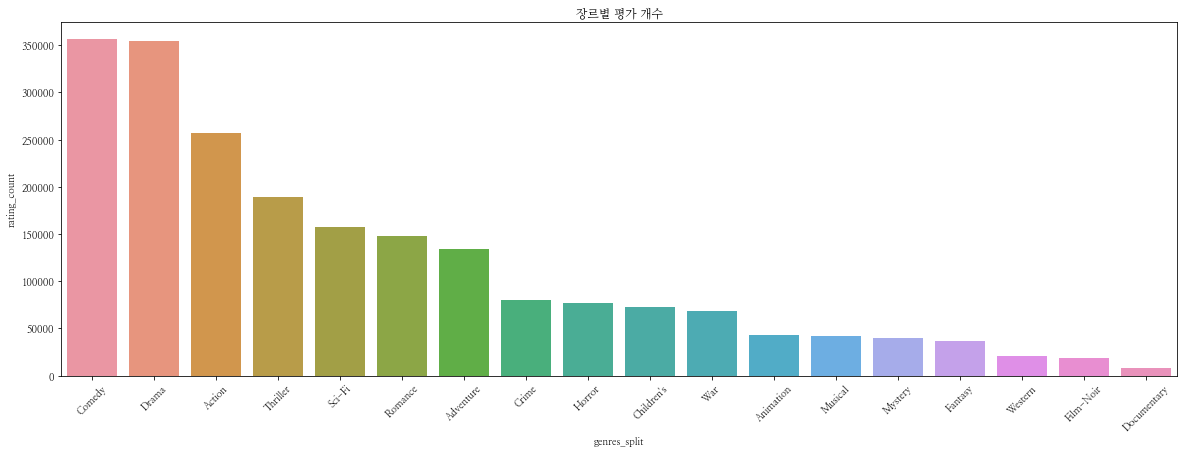

In [23]:
# Îã§ÌÅêÎ©òÌÑ∞Î¶¨ ÌèâÏ†ê
# Ïû•Î•¥Î≥ÑÎ°ú ÌèâÍ∞Ä Í∞úÏàò, xÏ∂ï: Ïû•Î•¥, yÏ∂ï: ÌèâÍ∞Ä Í∞úÏàò
rating_by_genre_df_sorted_by_count = rating_by_genre_df.sort_values('rating_count', ascending=False)

plt.figure(figsize=(20, 6.5))
sns.barplot(x='genres_split', y='rating_count', data=rating_by_genre_df_sorted_by_count)
plt.title('Ïû•Î•¥Î≥Ñ ÌèâÍ∞Ä Í∞úÏàò')
plt.xticks(rotation=45)
plt.show()

- ÎÜíÏùÄ ÌèâÏ†êÏùÑ Î≥¥Ïù∏ Îã§ÌÅêÎ©òÌÑ∞Î¶¨ Ïû•Î•¥Í∞Ä ÌôïÏó∞Ìûà Ï†ÅÎã§
- Ìé∏Ìñ•Îêú Îç∞Ïù¥ÌÑ∞Ïùº Ïàò ÏûàÎã§
- ÌòπÏùÄ Îã§ÌÅêÎ©òÌÑ∞Î¶¨ ÏòÅÌôîÎ•º Î≥∏ ÏÇ¨Ïö©ÏûêÎäî ÌôïÏã§Ìïú Ï∑®Ìñ•Ïù¥ ÏûàÏùÑ Ïàò ÏûàÏùå!

### Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù ÎßàÎ¨¥Î¶¨

- ÏÇ¨Ïö©Ïûê Îç∞Ïù¥ÌÑ∞(users)ÏôÄ ÏÇ¨Ïö©ÏûêÍ∞Ä Í∞ÄÏßÄÍ≥† ÏûàÎäî ÏßÅÏóÖ(occupation)ÏùÑ Îß§ÌïëÌï¥ÏÑú Îç∞Ïù¥ÌÑ∞Î•º ÍπäÍ≤å ÏÇ¥Ìé¥Î≥¥Í≥† Ïã∂Îã§Î©¥ ÏÇ¨Ïö©

In [24]:
# Occupation
occupation_map = {
    0:"other or not specified",
    1:"academic/educator",
    2:"artist",
    3:"clerical/admin",
    4:"college/grad student",
    5:"customer service",
    6:"doctor/health care",
    7:"executive/managerial",
    8:"farmer",
    9:"homemaker",
    10:"K-12 student",
    11:"lawyer",
    12:"programmer",
    13:"retired",
    14:"sales/marketing",
    15:"scientist",
    16:"self-employed",
    17:"technician/engineer",
    18:"tradesman/craftsman",
    19:"unemployed",
    20:"writer"
}

In [25]:
users['occupation_nm'] = users['occupation'].map(occupation_map)
users.head()

user_id gender  age  occupation    zip         occupation_nm
0        1      F    1          10  48067          K-12 student
1        2      M   56          16  70072         self-employed
2        3      M   25          15  55117             scientist
3        4      M   45           7  02460  executive/managerial
4        5      M   25          20  55455                writer

## 3. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

- Îã§ÏùåÍ≥º Í∞ôÏùÄ ÌîºÏ≤ò(feature)Îì§Ïóê ÎåÄÌï¥ ÏÉÅÌò∏ÏûëÏö© Î™®Îç∏ÎßÅ
    - ÏÇ¨Ïö©Ïûê : ÏÇ¨Ïö©Ïûê ID, ÏÑ±Î≥Ñ, ÎÇòÏù¥, ÏßÄÏó≠, ÏßÅÏóÖ
    - ÏòÅÌôî : ÏòÅÌôî ID, Ïû•Î•¥, ÏãúÍ∏∞
    - ÌèâÏ†ê : ÏÇ¨Ïö©Ïûê ID, ÏòÅÌôî ID, ÌèâÏ†ê, ÏãúÍ∏∞
    
üòÜ 'Ïñ¥Îñ§ ÏÇ¨Ïö©ÏûêÍ∞Ä Ïñ¥Îñ§ ÏòÅÌôîÎ•º Ïñ∏Ï†ú, Î™á Ï†êÏùò ÌèâÍ∞ÄÎ•º Ï£ºÏóàÎã§'Îäî ÏÉÅÌò∏ÏûëÏö© Îç∞Ïù¥ÌÑ∞ ÌôúÏö©

In [26]:
# ÎùºÏù¥Î∏åÎü¨Î¶¨ Ìò∏Ï∂ú  
import re 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import random
plt.rc('font', family='NanumMyeongjo')

In [27]:
# Ïª¨Îüº Ï†ïÎ≥¥ ÏßÄÏ†ï
user_colums = ['user_id', 'gender', 'age', 'occupation', 'zip']
rating_columns = ['user_id', 'movie_id', 'rating', 'timestamp']
movie_columns = ['movie_id', 'title', 'genres']

In [28]:
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ 
users = pd.read_csv(f'{data_path}/users.dat', sep='::', header=None, names=user_colums, engine='python')
ratings = pd.read_csv(f'{data_path}/ratings.dat', sep='::', header=None, names=rating_columns, engine='python')
movies = pd.read_csv(f'{data_path}/movies.dat', sep='::', header=None, names=movie_columns, engine='python', encoding='latin-1')

In [29]:
# ÏÇ¨Ïö©Ïûê Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
print(users.shape)
users.head()

(6040, 5)


user_id gender  age  occupation    zip
0        1      F    1          10  48067
1        2      M   56          16  70072
2        3      M   25          15  55117
3        4      M   45           7  02460
4        5      M   25          20  55455

In [30]:
# ÏòÅÌôî Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
print(movies.shape)
movies.head()

(3883, 3)


movie_id                               title                        genres
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of the Bride Part II (1995)                        Comedy

In [31]:
# ÌèâÏ†ê Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
print(ratings.shape)
ratings.head()

(1000209, 4)


user_id  movie_id  rating  timestamp
0        1      1193       5  978300760
1        1       661       3  978302109
2        1       914       3  978301968
3        1      3408       4  978300275
4        1      2355       5  978824291

### 3.2 ÏòÅÌôî Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

- 

In [32]:
# Ï†úÎ™© Îí§Ïóê Î∂ôÏñ¥ ÏûàÎäî Ïó∞ÎèÑÎ•º Ï†ïÍ∑úÌëúÌòÑÏãùÏùÑ ÌôúÏö©Ìï¥ Ï∂îÏ∂úÌï©ÎãàÎã§. 
# ÎÖÑÎåÄ Ï∂îÏ∂ú
movies['movie_year'] = movies['title'].str.extract(r'\((\d{4})\)')
movies.head()

movie_id                               title                        genres  \
0         1                    Toy Story (1995)   Animation|Children's|Comedy   
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy   
2         3             Grumpier Old Men (1995)                Comedy|Romance   
3         4            Waiting to Exhale (1995)                  Comedy|Drama   
4         5  Father of the Bride Part II (1995)                        Comedy   

  movie_year  
0       1995  
1       1995  
2       1995  
3       1995  
4       1995

Ï†úÎ™©ÏóêÏÑú ÏòÅÌôîÏùò Ïó∞ÎèÑÎ•º ÎΩëÏïÑÎÇ∏Îã§ ‚á¢ Ïó∞ÎèÑÏóêÏÑú Ïó∞ÎèÑÎ•º 10ÏúºÎ°ú ÎÇòÎàà ÎÇòÎ®∏ÏßÄÎ•º ÎπºÎ©¥ ÎÖÑÎåÄÏù¥Îã§.

    Ïòà) 1995ÎÖÑ ÏòÅÌôî
    1995 % 10 = 5
    1995 - 5 = 1990 ‚ûî 90ÎÖÑÎåÄ ÏòÅÌôî

In [33]:
a = 1995 % 10
b = 1995 - a

print(a)
print(b)

5
1990


In [34]:
# 90ÎÖÑÎåÄ ÏòÅÌôî, 2000ÎÖÑÎåÄ ÏòÅÌôî Îì±Í≥º Í∞ôÏùÄ ÎÖÑÎåÄ Ï†ïÎ≥¥Î•º Ï∂îÏ∂úÌï©ÎãàÎã§. 
movies['movie_decade'] = movies['title'].str.extract(r'\((\d{4})\)')[0].astype(int).apply(lambda x: str(x - (x % 10)) + 's')
# title Ïª¨ÎüºÏóêÏÑú Ïó∞ÎèÑ Ï†ïÎ≥¥Î•º ÎπºÍ≥† Ï†úÎ™©Îßå Îî∞Î°ú Ï∂îÏ∂úÌï©ÎãàÎã§.
movies['title'] = movies['title'].apply(lambda x: re.sub(r'\s*\(\d{4}\)', '', x))

In [35]:
movies.head()

movie_id                        title                        genres  \
0         1                    Toy Story   Animation|Children's|Comedy   
1         2                      Jumanji  Adventure|Children's|Fantasy   
2         3             Grumpier Old Men                Comedy|Romance   
3         4            Waiting to Exhale                  Comedy|Drama   
4         5  Father of the Bride Part II                        Comedy   

  movie_year movie_decade  
0       1995        1990s  
1       1995        1990s  
2       1995        1990s  
3       1995        1990s  
4       1995        1990s

- Ïù¥Ï†ÑÏóêÎäî Î∂ÑÎ¶¨Îêú Ïû•Î•¥Î•º Ìñâ(row)Ïóê Ï∂îÍ∞ÄÌïòÏòÄÎã§Î©¥, Ïù¥Î≤àÏóêÎäî Ïª¨Îüº(Ïó¥)Ïóê Ï∂îÍ∞Ä
- Ïù¥Î†áÍ≤å Íµ¨ÏÑ±ÌïòÎäî Ïù¥Ïú†Îäî ÎÇòÏ§ëÏóê Î™®Îç∏ inputÏóê ÎÑ£ÏùÑ Îïå Ìé∏Î¶¨ÌïòÍ∏∞ ÎïåÎ¨∏

In [36]:
# | Í∏∞Ìò∏Î•º Í∏∞Ï§ÄÏúºÎ°ú Ïû•Î•¥ Îç∞Ïù¥ÌÑ∞Î•º Î∂ÑÎ¶¨Ìï©ÎãàÎã§. 
genres_split = movies['genres'].str.split('|')

In [37]:
max_genres = genres_split.apply(len).max() 

# Í∞Å Ïû•Î•¥Î≥ÑÎ°ú ÏÉàÎ°úÏö¥ Ïª¨ÎüºÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
for i in range(max_genres):
    movies[f'genre{i + 1}'] = genres_split.apply(lambda x: x[i] if i < len(x) else None)

# ÏõêÎûò ÏûàÎçò Ïû•Î•¥ Ïª¨ÎüºÏùÄ ÎÇ†Î†§Ï§çÎãàÎã§.
movies.drop('genres', axis=1, inplace=True)

# NoneÏùÄ Í≥µÎ∞±ÏúºÎ°ú Ï±ÑÏõÅÎãàÎã§.
movies.fillna('', inplace=True)

In [38]:
print(movies.shape)
movies.head()

(3883, 10)


movie_id                        title movie_year movie_decade     genre1  \
0         1                    Toy Story       1995        1990s  Animation   
1         2                      Jumanji       1995        1990s  Adventure   
2         3             Grumpier Old Men       1995        1990s     Comedy   
3         4            Waiting to Exhale       1995        1990s     Comedy   
4         5  Father of the Bride Part II       1995        1990s     Comedy   

       genre2   genre3 genre4 genre5 genre6  
0  Children's   Comedy                       
1  Children's  Fantasy                       
2     Romance                                
3       Drama                                
4

In [39]:
# Î™®Îì† Ïû•Î•¥Ïùò Ï¢ÖÎ•ò
set(movies['genre1'].unique().tolist() + movies['genre2'].unique().tolist() + movies['genre3'].unique().tolist())

{'',
 'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

### 3.3 ÌèâÏ†ê Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

In [40]:
timestamp = 978300760 
dt_object = datetime.fromtimestamp(timestamp)

print(dt_object.strftime("%Y-%m-%d"))

2000-12-31


In [41]:
ratings['timestamp'] = ratings['timestamp'].apply(lambda x : datetime.fromtimestamp(x).strftime("%Y-%m-%d"))
ratings.head()

user_id  movie_id  rating   timestamp
0        1      1193       5  2000-12-31
1        1       661       3  2000-12-31
2        1       914       3  2000-12-31
3        1      3408       4  2000-12-31
4        1      2355       5  2001-01-06

In [42]:
ratings['rating_year'] = ratings['timestamp'].apply(lambda x : x.split("-")[0]) 
ratings['rating_month'] = ratings['timestamp'].apply(lambda x : x.split("-")[1])
ratings['rating_decade'] = ratings['rating_year'].astype(int).apply(lambda x: str(x - (x % 10)) + 's')

In [43]:
ratings.head()

user_id  movie_id  rating   timestamp rating_year rating_month  \
0        1      1193       5  2000-12-31        2000           12   
1        1       661       3  2000-12-31        2000           12   
2        1       914       3  2000-12-31        2000           12   
3        1      3408       4  2000-12-31        2000           12   
4        1      2355       5  2001-01-06        2001           01   

  rating_decade  
0         2000s  
1         2000s  
2         2000s  
3         2000s  
4         2000s

In [44]:
# ÏûÑÏãú Ï†ÄÏû• 
movies.to_csv(f"{data_path}/movies_prepro.csv", index=False)
ratings.to_csv(f"{data_path}/ratings_prepro.csv", index=False)
users.to_csv(f"{data_path}/users_prepro.csv", index=False)

In [45]:
!ls ./aiffel/autoint/ml-1m

movielens_rcmm_v1.csv  movies_prepro.csv   README
movielens_rcmm_v2.csv  ratings.dat	   users.dat
movies.dat	       ratings_prepro.csv  users_prepro.csv


### 3.4 Î™®Îç∏ ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±

Ï∂îÏ≤ú ÏãúÏä§ÌÖúÏóê ÌôúÏö©ÎêòÎäî Îç∞Ïù¥ÌÑ∞Îäî ÌÅ¨Í≤å ÏïÑÎûòÏôÄ Í∞ôÏù¥ Íµ¨Î∂ÑÎê† Ïàò ÏûàÏäµÎãàÎã§.

1) Î™ÖÏãùÏ†Å Îç∞Ïù¥ÌÑ∞(Explicit data): ÏÇ¨Ïö©ÏûêÍ∞Ä ÏßÅÏ†ëÏ†ÅÏúºÎ°ú ÏÑ†Ìò∏ÎèÑÎ•º ÌëúÌòÑÌïú Îç∞Ïù¥ÌÑ∞(Ïòà: ÌèâÏ†ê, Íµ¨ÎèÖ, ÎåìÍ∏Ä, Î¶¨Î∑∞, Ï¢ãÏïÑÏöî, Ïã´Ïñ¥Ïöî, Ï∞®Îã® Îì±) \
2) ÏïîÎ¨µÏ†Å Îç∞Ïù¥ÌÑ∞(Implicit data): ÏÇ¨Ïö©ÏûêÍ∞Ä Í∞ÑÏ†ëÏ†ÅÏúºÎ°ú ÏÑ†Ìò∏ÎèÑÎ•º ÌëúÌòÑÌïú Îç∞Ïù¥ÌÑ∞(Ïòà: ÌÅ¥Î¶≠ Ïó¨Î∂Ä, Í≤ÄÏÉâ Í∏∞Î°ù, Î∞©Î¨∏ ÌéòÏù¥ÏßÄ, ÎßàÏö∞Ïä§ ÏõÄÏßÅÏûÑ, Íµ¨Îß§ ÎÇ¥Ïó≠, ÏãúÏ≤≠ ÏãúÍ∞ÑÎåÄ Îì±)

Î™ÖÏãúÏ†Å Îç∞Ïù¥ÌÑ∞, ÏòàÎ•º Îì§Ïñ¥ ÌèâÏ†ê Îç∞Ïù¥ÌÑ∞ÎùºÎ©¥ 1~5Ï†êÍ≥º Í∞ôÏùÄ Î∂ÑÌè¨Î°ú Îç∞Ïù¥ÌÑ∞Í∞Ä Ï°¥Ïû¨ÌïòÍ≤å ÎêòÍ≥† Ïù¥Îäî Ïù¥ÏßÑ Î∂ÑÎ•ò(binary classification) Î¨∏Ï†úÎùºÍ∏∞ Î≥¥Îã§ ÌöåÍ∑Ä(regression) Î¨∏Ï†úÎÇò Îã§Ï§ë Î∂ÑÎ•ò(multiclass classification) Î¨∏Ï†úÎùºÍ≥† Î≥º Ïàò ÏûàÏùÑ Í≤ÉÏûÖÎãàÎã§.

ÌïòÏßÄÎßå ÏïîÎ¨µÏ†Å Îç∞Ïù¥ÌÑ∞Ïù∏ ÌÅ¥Î¶≠ Ïó¨Î∂ÄÎ°ú Î≥¥Î©¥ Ïñ¥Îñ®ÍπåÏöî?

ÌÅ¥Î¶≠ Ïó¨Î∂ÄÎäî 'ÌÅ¥Î¶≠ÏùÑ ÌñàÎã§, ÏïàÌñàÎã§'ÏôÄ Í∞ôÏù¥ 0Í≥º 1Î°ú Î∂ÑÎ¶¨Ìï† Ïàò ÏûàÏäµÎãàÎã§. Ïù¥ Îïå ÌÅ¥Î¶≠ÏùÑ ÌñàÎã§Îäî Í≤ÉÏùÄ 'ÏÑ†Ìò∏'ÌïúÎã§ÎùºÎäî ÏùòÎØ∏ÎèÑ Îã¥Í≥† ÏûàÍ∏∞Ïóê, ÏÑ†Ìò∏ Ï†ïÎ≥¥Î•º Î™®Îç∏ÎßÅÌïúÎã§Í≥†ÎèÑ Î≥º Ïàò ÏûàÏäµÎãàÎã§.

Î¨¥ÏóáÏù¥ Ï†ïÎãµÏù∏ÏßÄÎäî Îî∞Î°ú Ï†ïÌï¥ÏßÑ Î∞îÍ∞Ä ÏóÜÏäµÎãàÎã§. Îç∞Ïù¥ÌÑ∞ÏôÄ ÏÑúÎπÑÏä§ Ï†ÑÎûµÏóê Îî∞Îùº Ï†ïÎãµÏùÄ Îã¨ÎùºÏßëÎãàÎã§.

Ïù¥Î≤à ÌîÑÎ°úÏ†ùÌä∏ÏóêÏÑúÎäî 'ÏÑ†Ìò∏ÌñàÎã§'Î•º Í∏∞Ï§ÄÏúºÎ°ú ÏÇ¥Ìé¥Î≥¥Î†§Í≥† Ìï©ÎãàÎã§.

Í∑∏Îü∞Îç∞ Ïó¨Í∏∞ÏÑú Î¨∏Ï†úÍ∞Ä ÌïòÎÇò ÏûàÏäµÎãàÎã§. Í∑∏Îüº 'ÏÑ†Ìò∏ÌñàÎã§'ÎùºÎäî Ï†ïÎ≥¥Îäî Î¨¥ÏóáÏù¥Í≥† 'ÏÑ†Ìò∏ÌïòÏßÄ ÏïäÎäîÎã§'ÎùºÎäî Ï†ïÎ≥¥Îäî Î¨¥ÏóáÏùºÍπåÏöî? Í∑∏Î¶¨Í≥† Í∑∏Îü∞ Îç∞Ïù¥ÌÑ∞Í∞Ä MovieLensÏóê ÏûàÏùÑÍπåÏöî? Ïù¥ Î¨∏Ï†úÎ•º ÌíÄÏñ¥ÎÇòÍ∞ÄÎ≥¥Î†§Í≥† Ìï©ÎãàÎã§.

### 3.4.1 ÎûúÎç§ ÏÉòÌîåÎßÅ Í∏∞Î∞ò Î∞©Î≤ï


In [46]:
# 1. 3Ï†ê Ïù¥ÏÉÅÏùò Ï†êÏàòÎ•º Î∂ÄÏó¨Ìïú ÏòÅÌôîÎ•º 'ÏÑ†Ìò∏'ÏòÅÌôîÎùºÍ≥† Í∞ÄÏ†ïÌïòÍ≥†, Ïù¥Î•º label=1Î°ú ÏÉùÏÑ±Ìï©ÎãàÎã§.
ratings = ratings[ratings['rating'] >= 3]
ratings['label'] = 1
ratings.drop('rating', axis=1, inplace=True)
print(ratings.shape)
ratings.head()

(836478, 7)


user_id  movie_id   timestamp rating_year rating_month rating_decade  label
0        1      1193  2000-12-31        2000           12         2000s      1
1        1       661  2000-12-31        2000           12         2000s      1
2        1       914  2000-12-31        2000           12         2000s      1
3        1      3408  2000-12-31        2000           12         2000s      1
4        1      2355  2001-01-06        2001           01         2000s      1

In [47]:
# 1. ÏÇ¨Ïö©ÏûêÍ∞Ä Î¥§Îçò(ÏÑ†Ìò∏ÌñàÎçò) ÏòÅÌôî Î¶¨Ïä§Ìä∏Î•º Ï∂îÏ∂úÌï©ÎãàÎã§. ÏÇ¨Ïö©ÏûêÎßàÎã§ ÌèâÏ†êÏù¥ 3Ï†ê Ïù¥ÏÉÅÏù∏ ÏòÅÌôî Î¶¨Ïä§Ìä∏Í∞Ä Íµ¨ÏÑ±Îê©ÎãàÎã§. 
user_seen_movies = ratings.groupby('user_id')['movie_id'].apply(list).reset_index()
user_seen_movies.head()

user_id                                           movie_id
0        1  [1193, 661, 914, 3408, 2355, 1197, 1287, 2804,...
1        2  [1357, 3068, 1537, 647, 2194, 648, 2268, 2628,...
2        3  [3421, 648, 1394, 3534, 104, 2735, 1210, 1431,...
3        4  [3468, 1210, 2951, 1214, 1036, 260, 2028, 480,...
4        5  [2987, 2333, 1175, 39, 2337, 1535, 1392, 1466,...

In [48]:
# 2. Î®ºÏ†Ä Í≥†Ïú† ÏòÅÌôîÏôÄ Í≥†Ïú† ÏÇ¨Ïö©ÏûêÎì§ÏùÑ Í∞ÄÏßÄÍ≥† ÏòµÎãàÎã§. 
unique_movies = movies['movie_id'].unique()
unique_users = users['user_id'].unique()
negative_users = []
negative_movies = []
negative_labels = []

# ÏÇ¨Ïö©ÏûêÎ≥ÑÎ°ú ÌïòÎÇòÏî© ÏßÑÌñâÌï©ÎãàÎã§.
for user in unique_users:
    # Ï∂©Î∂ÑÌïú Ïù¥Î†•Ïù¥ ÏóÜÎäî ÏÇ¨Ïö©ÏûêÎäî ÎÑòÏñ¥Í∞ëÎãàÎã§. Ï∂©Î∂ÑÌïú Ïù¥Î†•Ïù¥ ÏóÜÎäî ÏÇ¨Ïö©Ïûê Îç∞Ïù¥ÌÑ∞Îäî ÌõàÎ†®Ïóê Î∞©Ìï¥Í∞Ä ÎêòÍ≥† overfitting Îì±Ïù¥ Îê† Ïàò ÏûàÏäµÎãàÎã§.
    if len(user_seen_movies[user_seen_movies['user_id'] == user]) < 1:
        continue
    # 2-1. Ìï¥Îãπ ÏÇ¨Ïö©ÏûêÍ∞Ä ÏÑ†Ìò∏ÌïòÎäî ÏòÅÌôî Î¶¨Ïä§Ìä∏Î•º Í∞ÄÏßÄÍ≥† ÏòµÎãàÎã§.
    user_seen_movie_list = user_seen_movies[user_seen_movies['user_id'] == user]['movie_id'].values[0]
    # 2-2. Ï†ÑÏ≤¥ ÏòÅÌôî Ï§ë ÏÇ¨Ïö©ÏûêÍ∞Ä ÏÑ†Ìò∏Ìïú ÏòÅÌôî Ï†ïÎ≥¥Î•º Ï†úÏô∏Ìï©ÎãàÎã§.
    user_non_seen_movie_list = list(set(unique_movies) - set(user_seen_movie_list))
    # 2-3. ÏÑ†Ìò∏ ÏòÅÌôî 1Í∞úÎãπ ÎπÑÏÑ†Ìò∏ ÏòÅÌôî 5Í∞úÎ•º Ï∂îÏ∂úÌï©ÎãàÎã§. 
    sample_pop_size = len(user_seen_movie_list)*5
    # ÎßåÏïΩ ÎπÑÏÑ†Ìò∏ ÏòÅÌôî ÏÉòÌîå Í∞úÏàòÍ∞Ä Ï†ÑÏ≤¥ ÏòÅÌôî Í∞úÏàòÎ≥¥Îã§ ÌÅ¨Î©¥, ÎπÑÏÑ†Ìò∏ ÏòÅÌôî ÏÉòÌîå Í∞úÏàòÎäî Ï†ÑÏ≤¥ ÏòÅÌôî Í∞úÏàòÏóêÏÑú ÏÇ¨Ïö©ÏûêÍ∞Ä ÏÑ†Ìò∏Ìïú ÏòÅÌôîÏùò Í∞úÏàòÎ•º Î∫Ä Í∞í(Ìï¥Îãπ ÏÇ¨Ïö©Ïûê ÏûÖÏû•ÏóêÏÑ† ÏÉòÌîåÎßÅ ÏµúÎåÄ Í∞í)ÏúºÎ°ú ÏÑ§Ï†ïÌï©ÎãàÎã§.
    if len(unique_movies) - len(user_seen_movie_list) < len(user_seen_movie_list)*5 :
        sample_pop_size = len(unique_movies) - len(user_seen_movie_list)
    # ÎûúÎç§ÏúºÎ°ú Ï∂îÏ∂úÌï©ÎãàÎã§. 
    user_negative_movie_list = random.sample(user_non_seen_movie_list, sample_pop_size)
    
    # Ìï¥Îãπ Í∞íÎì§ÏùÑ Î¶¨Ïä§Ìä∏Ïóê Ï†ÄÏû•Ìï©ÎãàÎã§.
    negative_users += [user for _ in range(len(user_negative_movie_list))]
    negative_movies += user_negative_movie_list
    negative_labels += [0 for _ in range(len(user_negative_movie_list))]

- Ïù¥Î†áÍ≤å ÎßåÎì§Ïñ¥ÏßÑ Î¶¨Ïä§Ìä∏Îäî ÏÇ¨Ïö©ÏûêÍ∞Ä 'ÎπÑÏÑ†Ìò∏'ÌïúÎã§Îäî Ï†ïÎ≥¥Î•º Îã¥Í≥† ÏûàÏäµÎãàÎã§. Îî∞ÎùºÏÑú, labelÎèÑ 0ÏûÖÎãàÎã§.
- Ïù¥Ï†ú Ïù¥ Îç∞Ïù¥ÌÑ∞Î•º ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú ÎßåÎì§Í≥† ÏÇ¨Ïö©Ïûê ÏÑ†Ìò∏ Ï†ïÎ≥¥ÏôÄ Ìï©Ï≥êÏ£ºÎ©¥ 0Í≥º 1Ïù¥ Ï°∞Ìï©Îêú ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Í∞Ä ÎßåÎì§Ïñ¥ ÏßëÎãàÎã§.

In [49]:
print(len(negative_users))
print(len(negative_movies))
print(len(negative_labels))

4068124
4068124
4068124


In [50]:
negative_ratings_df = pd.DataFrame({'user_id' : negative_users, 'movie_id' : negative_movies, 'label':negative_labels})
print(negative_ratings_df.shape)
negative_ratings_df.head()

(4068124, 3)


user_id  movie_id  label
0        1       187      0
1        1      3699      0
2        1      3029      0
3        1      1422      0
4        1       954      0

- ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú Î™®Îç∏ ÌõàÎ†®Ïóê ÏÇ¨Ïö©ÌïòÎäî Îç∞Ïù¥ÌÑ∞Î•º Íµ¨ÏÑ±ÌïòÍ∏∞ ÏúÑÌï¥ÏÑú ÌïÑÏöîÌïú Ïª¨ÎüºÎßå Ï∂îÏ∂úÌï¥ ÌôúÏö©Ìï©ÎãàÎã§. ÌïÑÏöîÌïú Ïª¨ÎüºÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.

    - ÌèâÏ†ê : ÏÇ¨Ïö©Ïûê ID, ÏòÅÌôî ID, Î†àÏù¥Î∏î(label)
    - ÏòÅÌôî : ÏòÅÌôî ID, ÎÖÑÎåÄ, ÎÖÑÎèÑ, Ïû•Î•¥1
    - ÏÇ¨Ïö©Ïûê : ÏÇ¨Ïö©Ïûê ID, ÏÑ±Î≥Ñ, ÎÇòÏù¥, ÏßÄÏó≠, ÏßÅÏóÖ

Ïù¥ Îç∞Ïù¥ÌÑ∞Î•º Î™®ÏïÑ ÌïòÎÇòÎ°ú Ìï©Ï≥êÏ§çÎãàÎã§.

In [51]:
ratings_df = ratings[['user_id', 'movie_id', 'label']] 
ratings_df = pd.concat([ratings_df, negative_ratings_df], axis=0)
movies_df = movies[['movie_id', 'movie_decade', 'movie_year', 'genre1']]
movies_df.columns = ['movie_id', 'decade', 'movie_year', 'genre']
user_df = users[['user_id', 'gender', 'age', 'occupation', 'zip']]

In [52]:
merge_mlens_data = pd.merge(ratings_df, movies_df, on='movie_id')
merge_mlens_data = pd.merge(merge_mlens_data, user_df, on='user_id')
merge_mlens_data.dropna(inplace=True)
print(merge_mlens_data.shape)
merge_mlens_data.head()

(4904602, 10)


user_id  movie_id  label decade movie_year      genre gender  age  \
0        1      1193      1  1970s       1975      Drama      F    1   
1        1       661      1  1990s       1996  Animation      F    1   
2        1       914      1  1960s       1964    Musical      F    1   
3        1      3408      1  2000s       2000      Drama      F    1   
4        1      2355      1  1990s       1998  Animation      F    1   

   occupation    zip  
0          10  48067  
1          10  48067  
2          10  48067  
3          10  48067  
4          10  48067

In [53]:
merge_mlens_data = merge_mlens_data[['user_id', 'movie_id','decade', 'movie_year', 'genre', 'gender', 'age', 'occupation', 'zip', 'label']]
print(merge_mlens_data.shape)
merge_mlens_data.head()

(4904602, 10)


user_id  movie_id decade movie_year      genre gender  age  occupation  \
0        1      1193  1970s       1975      Drama      F    1          10   
1        1       661  1990s       1996  Animation      F    1          10   
2        1       914  1960s       1964    Musical      F    1          10   
3        1      3408  2000s       2000      Drama      F    1          10   
4        1      2355  1990s       1998  Animation      F    1          10   

     zip  label  
0  48067      1  
1  48067      1  
2  48067      1  
3  48067      1  
4  48067      1

In [54]:
merge_mlens_data.to_csv(f'{data_path}/movielens_rcmm_v1.csv', index=False)

In [55]:
!ls -l ./aiffel/autoint/ml-1m

total 332936
-rw-r--r-- 1 root root 211800303 Apr  9 12:50 movielens_rcmm_v1.csv
-rw-r--r-- 1 root root  67335303 Apr  9 12:44 movielens_rcmm_v2.csv
-rw-r----- 1 root root    171308 Mar 26  2003 movies.dat
-rw-r--r-- 1 root root    198094 Apr  9 12:50 movies_prepro.csv
-rw-r----- 1 root root  24594131 Feb 28  2003 ratings.dat
-rw-r--r-- 1 root root  36558754 Apr  9 12:50 ratings_prepro.csv
-rw-r----- 1 root root      5577 Jan 29  2016 README
-rw-r----- 1 root root    134368 Feb 28  2003 users.dat
-rw-r--r-- 1 root root    110242 Apr  9 12:50 users_prepro.csv


### 3.4.2 ÏÑ†Ìò∏ÎèÑÎ°ú ÎÇòÎàÑÍ∏∞

'1. ÎûúÎç§ ÏÉòÌîåÎßÅ Í∏∞Î∞ò Î∞©Î≤ï'ÏùÄ Í∑∏Î¶¨ Ï¢ãÏùÄ Î∞©Î≤ïÏùÄ ÏïÑÎãôÎãàÎã§. ÏôúÎÉêÌïòÎ©¥ ÏÇ¨Ïö©Ïûê Ï†ïÎ≥¥Î•º Î¨¥ÏûëÏúÑÎ°ú ÏÉòÌîåÎßÅÏùÑ Ìï¥ÏÑú ÏûÑÏùòÎ°ú Îç∞Ïù¥ÌÑ∞Î•º ÏÉùÏÑ±ÌñàÍ∏∞ ÎïåÎ¨∏ÏûÖÎãàÎã§. Í∞ÄÏû• Ï¢ãÏùÄ Í≤ÉÏùÄ ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞Î•º ÌôúÏö©ÌïòÎäî Í≤ÉÏù¥Ï£†.

Îî∞ÎùºÏÑú 2Î≤àÏß∏ Í≥ºÏ†ïÏóêÏÑúÎäî ÏÉòÌîåÎßÅÏùÑ ÌïòÏßÄ ÏïäÍ≥† Îç∞Ïù¥ÌÑ∞Î•º ÏÑ†Ìò∏ÎèÑÎ°ú ÎÇòÎàÑÎ†§Í≥† Ìï©ÎãàÎã§. Ïù¥ÌõÑ Î™®Îç∏ÏùÑ ÌõàÎ†®Ìï† ÎïåÎèÑ Ïù¥ Îç∞Ïù¥ÌÑ∞Î•º ÌôúÏö©Ìï† Í≤ÉÏûÖÎãàÎã§.

Î®ºÏ†Ä Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨Î•º ÌïòÍ≥† Ï†ÄÏû•ÌñàÎçò Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨ÏòµÏãúÎã§.

In [56]:
users_df = pd.read_csv(f'{data_path}/users_prepro.csv')
ratings_df = pd.read_csv(f'{data_path}/ratings_prepro.csv')
movies_df = pd.read_csv(f'{data_path}/movies_prepro.csv')

In [57]:
print(users_df.columns)
print(ratings_df.columns)
print(movies_df.columns)

Index(['user_id', 'gender', 'age', 'occupation', 'zip'], dtype='object')
Index(['user_id', 'movie_id', 'rating', 'timestamp', 'rating_year',
       'rating_month', 'rating_decade'],
      dtype='object')
Index(['movie_id', 'title', 'movie_year', 'movie_decade', 'genre1', 'genre2',
       'genre3', 'genre4', 'genre5', 'genre6'],
      dtype='object')


1Î≤à Í≥ºÏ†ïÏóêÏÑúÎäî ÌèâÏ†êÏù¥ 3Ï†ê Ïù¥ÏÉÅÏù∏ Îç∞Ïù¥ÌÑ∞Î•º label=1Î°ú ÏÑ§Ï†ïÌïòÍ≥† label=0ÏùÄ ÎûúÎç§ ÏÉòÌîåÎßÅÏúºÎ°ú Ï∂îÏ∂úÌñàÎäîÎç∞Ïöî, Ïù¥Î≤à Í≥ºÏ†ïÏóêÏÑúÎäî Îã§ÏùåÍ≥º Í∞ôÏùÄ ÏàúÏÑúÎ°ú Îç∞Ïù¥ÌÑ∞ ÏÑ†Ìò∏ÎèÑÎ•º Íµ¨ÏÑ±Ìï©ÎãàÎã§.

1. ÌèâÏ†êÏù¥ 4Ï†ê Ïù¥ÏÉÅÏù∏ Îç∞Ïù¥ÌÑ∞Î•º label=1, ÎÇòÎ®∏ÏßÄÎ•º label=0
2. ÌïÑÏöîÌïú Îç∞Ïù¥ÌÑ∞Îßå Ï∂îÏ∂úÌïòÍ≥† Ï†ÄÏû•

In [58]:
# 1. 4Ï†ê Ïù¥ÏÉÅÏù∏ Îç∞Ïù¥ÌÑ∞Î•º 1Î°ú, ÏïÑÎãå Îç∞Ïù¥ÌÑ∞Î•º 0ÏúºÎ°ú ÏÑ§Ï†ïÌï©ÎãàÎã§.  
ratings_df['label'] = ratings_df['rating'].apply(lambda x : x >=4).astype(int)

ratings_df = ratings_df[['user_id', 'movie_id', 'rating_year','rating_month', 'rating_decade', 'label']]
ratings_df.head()

user_id  movie_id  rating_year  rating_month rating_decade  label
0        1      1193         2000            12         2000s      1
1        1       661         2000            12         2000s      0
2        1       914         2000            12         2000s      0
3        1      3408         2000            12         2000s      1
4        1      2355         2001             1         2000s      1

In [59]:
# 2. ÌïÑÏöî Îç∞Ïù¥ÌÑ∞Îßå Í∞ÄÏßÄÍ≥† ÏòµÎãàÎã§. ÌäπÌûà Ïû•Î•¥Îäî 3Í∞úÎßå Í∞ÄÏßÄÍ≥† ÏôÄÏÑú ÌôúÏö©Ìï©ÎãàÎã§.  
movies_df = movies_df[['movie_id', 'movie_decade', 'movie_year', 'genre1', 'genre2', 'genre3']]
users_df = users_df[['user_id', 'gender', 'age', 'occupation', 'zip']]

In [60]:
# ÌïÑÏöîÌïú Îç∞Ïù¥ÌÑ∞Î•º Ìï©Ï≥êÏ§çÎãàÎã§.   
merge_mlens_data = pd.merge(ratings_df, movies_df, on='movie_id')
merge_mlens_data = pd.merge(merge_mlens_data, users_df, on='user_id')
merge_mlens_data.fillna('no', inplace=True)
print(merge_mlens_data.shape)
merge_mlens_data.head()

(1000209, 15)


user_id  movie_id  rating_year  rating_month rating_decade  label  \
0        1      1193         2000            12         2000s      1   
1        1       661         2000            12         2000s      0   
2        1       914         2000            12         2000s      0   
3        1      3408         2000            12         2000s      1   
4        1      2355         2001             1         2000s      1   

  movie_decade  movie_year     genre1      genre2   genre3 gender  age  \
0        1970s        1975      Drama          no       no      F    1   
1        1990s        1996  Animation  Children's  Musical      F    1   
2        1960s        1964    Musical     Romance       no      F    1   
3        2000s        2000      Drama          no       no      F    1   
4        1990s        1998  Animation  Children's   Comedy      F    1   

   occupation    zip  
0          10  48067  
1          10  48067  
2          10  48067  
3          10  48067  
4          10  48067

In [61]:
merge_mlens_data = merge_mlens_data[['user_id', 'movie_id','movie_decade', 'movie_year', 'rating_year', 'rating_month', 'rating_decade', 'genre1','genre2', 'genre3', 'gender', 'age', 'occupation', 'zip', 'label']]
print(merge_mlens_data.shape)
merge_mlens_data.head()

(1000209, 15)


user_id  movie_id movie_decade  movie_year  rating_year  rating_month  \
0        1      1193        1970s        1975         2000            12   
1        1       661        1990s        1996         2000            12   
2        1       914        1960s        1964         2000            12   
3        1      3408        2000s        2000         2000            12   
4        1      2355        1990s        1998         2001             1   

  rating_decade     genre1      genre2   genre3 gender  age  occupation  \
0         2000s      Drama          no       no      F    1          10   
1         2000s  Animation  Children's  Musical      F    1          10   
2         2000s    Musical     Romance       no      F    1          10   
3         2000s      Drama          no       no      F    1          10   
4         2000s  Animation  Children's   Comedy      F    1          10   

     zip  label  
0  48067      1  
1  48067      0  
2  48067      0  
3  48067      1  
4  48067      1

In [62]:
# Ï†ÄÏû•Ìï©ÎãàÎã§.
merge_mlens_data.to_csv(f'{data_path}/movielens_rcmm_v2.csv', index=False)

## 4. AutoInt Î™®Îç∏ Íµ¨ÌòÑ Î∞è ÌïôÏäµ

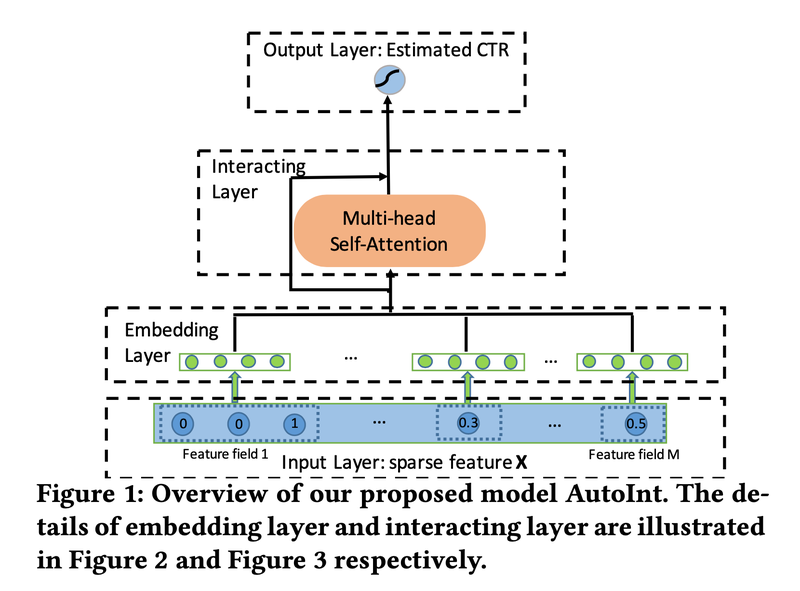

In [6]:
import time
import random
import pandas as pd
import numpy as np

from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, MaxPooling2D, Conv2D, Dropout, Lambda, Dense, Flatten, Activation, Input, Embedding, BatchNormalization
from tensorflow.keras.initializers import glorot_normal, Zeros, TruncatedNormal
from tensorflow.keras.regularizers import l2


from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy


from tensorflow.keras.optimizers import Adam
from collections import defaultdict
import math

In [7]:
# ÏûÑÎ≤†Îî© Î†àÏù¥Ïñ¥
class FeaturesEmbedding(Layer):  
    '''
    ÏûÑÎ≤†Îî© Î†àÏù¥Ïñ¥ÏûÖÎãàÎã§. 
    - ÎßåÏïΩ ÌîºÏ≤ò(feature) 3Í∞úÍ∞Ä Í∞ÅÍ∞Å 10Í∞ú, 20Í∞ú, 30Í∞úÏùò Í≥†Ïú†Í∞íÏùÑ Í∞ÄÏßÑÎã§Î©¥ feature_dimsÎäî [10, 20, 30] ÌòïÌÉúÎ•º ÎùÑÍ≤å Îê©ÎãàÎã§.
    - Ï†ÑÏ≤¥ ÏûÑÎ≤†Îî©ÏùÑ Ìï¥Ïïº Ìï† Í∞úÏàòÎäî 10+20+30 = 60Ïù¥ÎØÄÎ°ú '60 x ÏûÑÎ≤†Îî©_Ï∞®Ïõê_ÌÅ¨Í∏∞'Ïùò ÌñâÎ†¨Ïù¥ ÏÉùÏÑ±ÎêòÍ≤å Îê©ÎãàÎã§.
    '''
    def __init__(self, field_dims, embed_dim, **kwargs):
        super(FeaturesEmbedding, self).__init__(**kwargs)
        self.total_dim = sum(field_dims)
        self.embed_dim = embed_dim
        self.offsets = np.array((0, *np.cumsum(field_dims)[:-1]), dtype=np.longlong)
        self.embedding = tf.keras.layers.Embedding(input_dim=self.total_dim, output_dim=self.embed_dim)

    def build(self, input_shape):
        # ÏûÑÎ≤†Îî©ÏùÑ ÎπåÎìúÌïòÍ≥† Ï¥àÍ∏∞ÌôîÌï©ÎãàÎã§.
        self.embedding.build(input_shape)
        self.embedding.set_weights([tf.keras.initializers.GlorotUniform()(shape=self.embedding.weights[0].shape)])

    def call(self, x):
        # Îì§Ïñ¥Ïò® ÏûÖÎ†•Ïùò ÏûÑÎ≤†Îî©ÏùÑ Í∞ÄÏ†∏ÎãàÎã§.
        x = x + tf.constant(self.offsets)
        return self.embedding(x)

In [8]:
# Îã§Ï∏µ ÌçºÏÖâÌä∏Î°†
class MultiLayerPerceptron(Layer):  
    '''
    DNN Î†àÏù¥Ïñ¥ÏûÖÎãàÎã§.
    - Tensorflow KerasÏóêÏÑúÎäî Dense Î†àÏù¥Ïñ¥Î•º ÏåìÏïÑÏò¨Î¶∞ Íµ¨Ï°∞ÏûÖÎãàÎã§.
    - ÌïÑÏöîÏóê Îî∞Îùº Î∞∞Ïπò Ï†ïÍ∑úÌôîÎèÑ ÏÇ¨Ïö©Ìï† Ïàò ÏûàÏäµÎãàÎã§.
    '''
    def __init__(self, input_dim, hidden_units, activation='relu', l2_reg=0, dropout_rate=0, use_bn=False, init_std=0.0001, output_layer=True):
        super(MultiLayerPerceptron, self).__init__()
        self.dropout_rate = dropout_rate
        self.use_bn = use_bn
        hidden_units = [input_dim] + list(hidden_units)
        if output_layer:
            hidden_units += [1]
        # Dense layerÎ•º ÏåìÏïÑÏò¨Î¶ΩÎãàÎã§.
        self.linears = [Dense(units, activation=None, kernel_initializer=tf.random_normal_initializer(stddev=init_std),
                              kernel_regularizer=tf.keras.regularizers.l2(l2_reg)) for units in hidden_units[1:]]
        # ÌôúÏÑ±Ìôî Ìï®ÏàòÎ•º ÏÑ∏ÌåÖÌï©ÎãàÎã§.
        self.activation = tf.keras.layers.Activation(activation)
        # ÌïÑÏöîÌïòÎã§Î©¥ Î∞∞ÏπòÏ†ïÍ∑úÌôîÎèÑ ÏßÑÌñâÌï©ÎãàÎã§.
        if self.use_bn:
            self.bn = [BatchNormalization() for _ in hidden_units[1:]]
        self.dropout = Dropout(dropout_rate)

    def call(self, inputs, training=False):
        x = inputs
        for i in range(len(self.linears)):
            # input dataÍ∞Ä Îì§Ïñ¥Ïò§Î©¥ layerÎ•º ÎèåÎ©¥ÏÑú Î≤°ÌÑ∞ Í∞íÏùÑ Í∞ÄÏ†∏Ïò§Í≤å Îê©ÎãàÎã§.
            x = self.linears[i](x)
            if self.use_bn:
                x = self.bn[i](x, training=training)
            # Í∞Å layerÎßàÎã§ ÎÇòÏò® Î≤°ÌÑ∞ Í∞íÏóê ÌôúÏÑ±Ìôî Ìï®ÏàòÏôÄ dropoutÏùÑ Ï†ÅÏö©ÏãúÏºú ÎπÑÏÑ†ÌòïÏÑ± Íµ¨Ï°∞ÏôÄ Í≥ºÏ†ÅÌï©ÏùÑ Î∞©ÏßÄÌï©ÎãàÎã§.
            x = self.activation(x)
            x = self.dropout(x, training=training)
        return x

In [9]:
class MultiHeadSelfAttention(Layer):  
    '''
    Î©ÄÌã∞ Ìó§Îìú ÏÖÄÌîÑ Ïñ¥ÌÖêÏÖò Î†àÏù¥Ïñ¥ÏûÖÎãàÎã§.
    - ÏúÑÏóê ÏûëÏÑ±Ìïú ÏàòÏãùÍ≥º Í∞ôÏù¥ ÎèôÏûëÎê©ÎãàÎã§.
    - ÌïÑÏöîÏóê Îî∞Îùº ÏûîÏ∞® Ïó∞Í≤∞(residual connection)ÎèÑ ÏßÑÌñâÌï©ÎãàÎã§.
    '''
    def __init__(self, att_embedding_size=8, head_num=2, use_res=True, scaling=False, seed=1024, **kwargs):
        if head_num <= 0:
            raise ValueError('head_num must be a int > 0')
        self.att_embedding_size = att_embedding_size
        self.head_num = head_num
        self.use_res = use_res
        self.seed = seed
        self.scaling = scaling
        super(MultiHeadSelfAttention, self).__init__(**kwargs)

    def build(self, input_shape):
        if len(input_shape) != 3:
            raise ValueError(
                "Unexpected inputs dimensions %d, expect to be 3 dimensions" % (len(input_shape)))
        embedding_size = int(input_shape[-1])
        # ÏøºÎ¶¨Ïóê Ìï¥ÎãπÌïòÎäî Îß§Ìä∏Î¶≠Ïä§ÏûÖÎãàÎã§. 
        self.W_Query = self.add_weight(name='query', shape=[embedding_size, self.att_embedding_size * self.head_num],
                                       dtype=tf.float32,
                                       initializer=TruncatedNormal(seed=self.seed))
        # ÌÇ§Ïóê Ìï¥ÎãπÎêòÎäî Îß§Ìä∏Î¶≠Ïä§ÏûÖÎãàÎã§.
        self.W_key = self.add_weight(name='key', shape=[embedding_size, self.att_embedding_size * self.head_num],
                                     dtype=tf.float32,
                                     initializer=TruncatedNormal(seed=self.seed + 1))
        # Í∞í(value)Ïóê Ìï¥ÎãπÎêòÎäî Îß§Ìä∏Î¶≠Ïä§ÏûÖÎãàÎã§.
        self.W_Value = self.add_weight(name='value', shape=[embedding_size, self.att_embedding_size * self.head_num],
                                       dtype=tf.float32,
                                       initializer=TruncatedNormal(seed=self.seed + 2))
        # ÌïÑÏöîÌïòÎã§Î©¥ ÏûîÏ∞® Ïó∞Í≤∞ÎèÑ Ìï† Ïàò ÏûàÏäµÎãàÎã§.
        if self.use_res:
            self.W_Res = self.add_weight(name='res', shape=[embedding_size, self.att_embedding_size * self.head_num],
                                         dtype=tf.float32,
                                         initializer=TruncatedNormal(seed=self.seed))

        super(MultiHeadSelfAttention, self).build(input_shape)

    def call(self, inputs, **kwargs):
        if K.ndim(inputs) != 3:
            raise ValueError("Unexpected inputs dimensions %d, expect to be 3 dimensions" % (K.ndim(inputs)))
        
        # ÏûÖÎ†•Ïù¥ Îì§Ïñ¥Ïò§Î©¥ ÏøºÎ¶¨, ÌÇ§, Í∞í(value)Ïóê Îß§Ïπ≠ÎêòÏñ¥ Í∞ÅÍ∞ÅÏùò Í∞íÏùÑ Í∞ÄÏßÄÍ≥† ÏòµÎãàÎã§.
        querys = tf.tensordot(inputs, self.W_Query, axes=(-1, 0))  
        keys = tf.tensordot(inputs, self.W_key, axes=(-1, 0))
        values = tf.tensordot(inputs, self.W_Value, axes=(-1, 0))

        # Ìó§Îìú Í∞úÏàòÏóê Îî∞Îùº Îç∞Ïù¥ÌÑ∞Î•º Î∂ÑÎ¶¨Ìï¥Ï§çÎãàÎã§.
        querys = tf.stack(tf.split(querys, self.head_num, axis=2))
        keys = tf.stack(tf.split(keys, self.head_num, axis=2))
        values = tf.stack(tf.split(values, self.head_num, axis=2))
        
        # ÏøºÎ¶¨ÏôÄ ÌÇ§Î•º Î®ºÏ†Ä Í≥±Ìï¥Ï§çÎãàÎã§. ÏúÑ Ïù¥ÎØ∏ÏßÄÏùò Ïãù (5)ÏôÄ Í∞ôÏäµÎãàÎã§.
        inner_product = tf.matmul(querys, keys, transpose_b=True)
        if self.scaling:
            inner_product /= self.att_embedding_size ** 0.5
        self.normalized_att_scores =  tf.nn.softmax(inner_product)
        
        # ÏøºÎ¶¨ÏôÄ ÌÇ§ÏóêÏÑú ÎÇòÏò® Ïñ¥ÌÖêÏÖò Í∞íÏùÑ Í∞í(value)Ïóê Í≥±Ìï¥Ï§çÎãàÎã§. Ïãù (6)Í≥º Í∞ôÏäµÎãàÎã§.
        result = tf.matmul(self.normalized_att_scores, values)
        # Ïãù (7)Í≥º Í∞ôÏù¥ Ï™ºÍ∞úÏñ¥ÏßÑ Î©ÄÌÖå Ìó§ÎìúÎ•º Î™®ÏïÑÏ§çÎãàÎã§.
        result = tf.concat(tf.split(result, self.head_num, ), axis=-1)
        result = tf.squeeze(result, axis=0) 

        if self.use_res:
            result += tf.tensordot(inputs, self.W_Res, axes=(-1, 0))
        result = tf.nn.relu(result)
        
        # Í∑∏ Í≤∞Í≥º Í∞íÏùÑ Î¶¨ÌÑ¥Ìï©ÎãàÎã§.

        return result

    def compute_output_shape(self, input_shape):

        return (None, input_shape[1], self.att_embedding_size * self.head_num)

    def get_config(self, ):
        config = {'att_embedding_size': self.att_embedding_size, 'head_num': self.head_num, 'use_res': self.use_res,'seed': self.seed}
        base_config = super(MultiHeadSelfAttention, self).get_config()
        base_config.update(config)
        return base_config

### 3.4.2 AutoInt Î™®Îç∏


In [10]:
class AutoInt(Layer): 
    '''
     AutoInt Î≥∏Ï≤¥ÏûÖÎãàÎã§. ÏïûÏÑúÏÑú Ï†ïÏùòÌïú layerÎ•º Í∞ÄÏ†∏ÏôÄÏÑú Í≥ÑÏÇ∞ÏùÑ ÏàòÌñâÌï©ÎãàÎã§.
    '''
    def __init__(self, field_dims, embedding_size, att_layer_num=3, att_head_num=2, att_res=True, 
                 l2_reg_dnn=0, l2_reg_embedding=1e-5, dnn_use_bn=False, dnn_dropout=0.4, init_std=0.0001):
        super(AutoInt, self).__init__()
        # ÏûÑÎ≤†Îî© Î†àÏù¥Ïñ¥Î•º Ï†ïÏùòÌï©ÎãàÎã§. 
        self.embedding = FeaturesEmbedding(field_dims, embedding_size)
        self.num_fields = len(field_dims)
        self.embedding_size = embedding_size
        # ÎßàÏßÄÎßâ Ï∂úÎ†• Î†àÏù¥Ïñ¥Î•º Ï†ïÏùòÌï©ÎãàÎã§.
        self.final_layer = Dense(1, use_bias=False, kernel_initializer=tf.random_normal_initializer(stddev=init_std))
        # Î©ÄÌã∞ Î†àÏù¥Ïñ¥ ÌçºÏÖâÌä∏Î°† Î†àÏù¥Ïñ¥Î•º Ï†ïÏùòÌï©ÎãàÎã§.
        self.int_layers = [MultiHeadSelfAttention(att_embedding_size=embedding_size, head_num=att_head_num, use_res=att_res) for _ in range(att_layer_num)]

    def call(self, inputs):
        # input Îç∞Ïù¥ÌÑ∞Ïóê Ìï¥ÎãπÎêòÎäî embedding Í∞íÏùÑ Í∞ÄÏ†∏ÏòµÎãàÎã§.
        att_input = self.embedding(inputs)
        # Î©ÄÌã∞ Ìó§Îìú ÏÖÄÌîÑ Ïñ¥ÌÖêÏÖò Î†àÏù¥Ïñ¥ÏóêÏÑú ÏÉÅÌò∏ÏûëÏö©ÏùÑ ÏàòÌñâÌï©ÎãàÎã§.
        for layer in self.int_layers:
            att_input = layer(att_input)

        att_output = Flatten()(att_input)
        # ÏµúÏ¢Ö Ï∂úÎ†•ÏûÖÎãàÎã§. 
        att_output = self.final_layer(att_output)
        # sigmoidÎ°ú ÏòàÏ∏°Í∞íÏùÑ Ï∂úÎ†•Ìï©ÎãàÎã§.
        y_pred = tf.nn.sigmoid(att_output)

        return y_pred

### 3.4.3 ÌèâÍ∞Ä ÏßÄÌëú


In [11]:
# ÌèâÍ∞Ä Ìï®ÏàòÎäî ÏïÑÎûòÏùò ÎßÅÌÅ¨ÏóêÏÑú Í∞ÄÏ†∏ÏôîÏäµÎãàÎã§.
# https://www.programcreek.com/python/?code=MaurizioFD%2FRecSys2019_DeepLearning_Evaluation%2FRecSys2019_DeepLearning_Evaluation-master%2FConferences%2FKDD%2FMCRec_our_interface%2FMCRecRecommenderWrapper.py
def get_DCG(ranklist, y_true):
    dcg = 0.0
    for i in range(len(ranklist)):
        item = ranklist[i]
        if item in y_true:
            dcg += 1.0 / math.log(i + 2)
    return  dcg

def get_IDCG(ranklist, y_true):
    idcg = 0.0
    i = 0
    for item in y_true:
        if item in ranklist:
            idcg += 1.0 / math.log(i + 2)
            i += 1
    return idcg

def get_NDCG(ranklist, y_true):
    '''NDCG ÌèâÍ∞Ä ÏßÄÌëú'''
    ranklist = np.array(ranklist).astype(int)
    y_true = np.array(y_true).astype(int)
    dcg = get_DCG(ranklist, y_true)
    idcg = get_IDCG(y_true, y_true)
    if idcg == 0:
        return 0
    return round( (dcg / idcg), 5)

def get_hit_rate(ranklist, y_true):
    '''hitrate ÌèâÍ∞Ä ÏßÄÌëú'''
    c = 0
    for y in y_true:
        if y in ranklist:
            c += 1
    return round( c / len(y_true), 5 )

### Î™®Îç∏ÌÖåÏä§Ìä∏

In [12]:
def test_model(model, test_df):
    '''Î™®Îç∏ ÌÖåÏä§Ìä∏'''
    user_pred_info = defaultdict(list)
    total_rows = len(test_df)
    for i in range(0, total_rows, batch_size):
        features = test_df.iloc[i:i + batch_size, :-1].values
        y_pred = model.predict(features, verbose=False)
        for feature, p in zip(features, y_pred):
            u_i = feature[:2]
            user_pred_info[int(u_i[0])].append((int(u_i[1]), float(p)))
    return user_pred_info

### Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ Î∞è ÏÑ∏ÌåÖ

- Ï†ÑÏ≤òÎ¶¨Ìïú Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
2. Î†àÏù¥Î∏î Ïù∏ÏΩîÎçî(label encoder)Î•º ÌÜµÌï¥ 0Î∂ÄÌÑ∞ ÌîºÏ≤ò(feature)Ïùò Í≥†Ïú† Í∞úÏàòÍπåÏßÄ Îß§Ìïë
    - Ïòà) ÏÑ±Î≥Ñ: ÎÇ®(M), Ïó¨(F)Î•º 0, 1Î°ú Î≥ÄÌôò
    - Ïòà) Ïû•Î•¥: ÏΩîÎ©îÎîî, ÎìúÎùºÎßà, Ïï°ÏÖòÏùÑ 0, 1, 2Î°ú Î≥ÄÌôò
3. ÌïôÏäµ(train) Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏(test) Îç∞Ïù¥ÌÑ∞Î°ú Î∂ÑÎ¶¨

In [13]:
# 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
# csv Îç∞Ïù¥ÌÑ∞Ïù¥ÎØÄÎ°ú read_csvÎ°ú Í∞ÄÏ†∏ÏòµÎãàÎã§.
movielens_rcmm = pd.read_csv(f"{data_path}/movielens_rcmm_v2.csv", dtype=str)
print(movielens_rcmm.shape)
movielens_rcmm.head()

(1000209, 15)


user_id movie_id movie_decade movie_year rating_year rating_month  \
0       1     1193        1970s       1975        2000           12   
1       1      661        1990s       1996        2000           12   
2       1      914        1960s       1964        2000           12   
3       1     3408        2000s       2000        2000           12   
4       1     2355        1990s       1998        2001            1   

  rating_decade     genre1      genre2   genre3 gender age occupation    zip  \
0         2000s      Drama          no       no      F   1         10  48067   
1         2000s  Animation  Children's  Musical      F   1         10  48067   
2         2000s    Musical     Romance       no      F   1         10  48067   
3         2000s      Drama          no       no      F   1         10  48067   
4         2000s  Animation  Children's   Comedy      F   1         10  48067   

  label  
0     1  
1     0  
2     0  
3     1  
4     1

In [14]:
# 2. ÎùºÎ≤® Ïù∏ÏΩîÎçî(label encoder)
# sklearnÏùò LabelEncoder(https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)
# labelÏùÄ Ï†úÏô∏Ìïú Í∞Å Ïª¨ÎüºÏùÑ ÎèåÎ©¥ÏÑú Í∞ÅÍ∞ÅÏùò Í≥†Ïú≥Í∞íÎì§ÏùÑ 0Î∂ÄÌÑ∞ nÍπåÏßÄ Îß§ÌïëÏãúÌÇµÎãàÎã§.
label_encoders = {col: LabelEncoder() for col in movielens_rcmm.columns[:-1]} # labelÏùÄ Ï†úÏô∏

for col, le in label_encoders.items():
    movielens_rcmm[col] = le.fit_transform(movielens_rcmm[col])

In [72]:
movielens_rcmm.head()

user_id  movie_id  movie_decade  movie_year  rating_year  rating_month  \
0        0       189             6          55            0             3   
1        0      3374             8          76            0             3   
2        0      3615             5          44            0             3   
3        0      2503             9          80            0             3   
4        0      1374             8          78            1             0   

   rating_decade  genre1  genre2  genre3  gender  age  occupation   zip label  
0              0       7      17      15       0    0           2  1588     1  
1              0       2       2       8       0    0           2  1588     0  
2              0      11      12      15       0    0           2  1588     0  
3              0       7      17      15       0    0           2  1588     1  
4              0       2       2       2       0    0           2  1588     1

In [15]:
movielens_rcmm['label'] = movielens_rcmm['label'].astype(np.float32)

In [16]:
# 3. ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏Îç∞Ïù¥ÌÑ∞Î°ú Î∂ÑÎ¶¨, 0.2 Ï†ïÎèÑÎ°ú Î∂ÑÎ¶¨
train_df, test_df = train_test_split(movielens_rcmm, test_size=0.2, random_state=42)

In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800167 entries, 416292 to 121958
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   user_id        800167 non-null  int64  
 1   movie_id       800167 non-null  int64  
 2   movie_decade   800167 non-null  int64  
 3   movie_year     800167 non-null  int64  
 4   rating_year    800167 non-null  int64  
 5   rating_month   800167 non-null  int64  
 6   rating_decade  800167 non-null  int64  
 7   genre1         800167 non-null  int64  
 8   genre2         800167 non-null  int64  
 9   genre3         800167 non-null  int64  
 10  gender         800167 non-null  int64  
 11  age            800167 non-null  int64  
 12  occupation     800167 non-null  int64  
 13  zip            800167 non-null  int64  
 14  label          800167 non-null  float32
dtypes: float32(1), int64(14)
memory usage: 94.6 MB


In [18]:
# ÌïÑÏöî Ïª¨ÎüºÎì§Í≥º Î†àÏù¥Î∏î Ï†ïÏùò
# ÌïÑÎìúÏùò Í∞Å Í≥†Ïú† Í∞úÏàòÎ•º Ï†ïÏùòÌïòÎäî field_dimsÎ•º Ï†ïÏùòÌï©ÎãàÎã§. Ïù¥Îäî  ÏûÑÎ≤†Îî© Îïå ÌôúÏö©Îê©ÎãàÎã§. 
u_i_feature = ['user_id', 'movie_id']
meta_features = ['movie_decade', 'movie_year', 'rating_year', 'rating_month', 'rating_decade', 'genre1','genre2', 'genre3', 'gender', 'age', 'occupation', 'zip']
label = 'label'
field_dims = np.max(movielens_rcmm[u_i_feature + meta_features].astype(np.int64).values, axis=0) + 1
field_dims

array([6040, 3706,   10,   81,    4,   12,    1,   18,   18,   16,    2,
          7,   21, 3439])

### ÌõàÎ†® ÌôòÍ≤Ω Î∞è Î™®Îç∏ ÏÑ∏ÌåÖ

- ÌõàÎ†®Ïóê ÏïûÏÑú ÌôòÍ≤Ω ÏÑ∏ÌåÖ

1. ÎìúÎ°≠ÏïÑÏõÉ, Î∞∞ÏπòÏÇ¨Ïù¥Ï¶à Îì± Î™®Îç∏ ÌõàÎ†®, Î™®Îç∏ ÏÑ§Ï†ï Îì±Ïùò ÏÑ∏ÌåÖ
2. Î™®Îç∏ Ï†ïÏùò

Îëê Í∞ÄÏßÄ Ï†ïÏùò 

In [19]:
# ÏóêÌè¨ÌÅ¨, ÌïôÏäµÎ•†, ÎìúÎ°≠ÏïÑÏõÉ, Î∞∞ÏπòÏÇ¨Ïù¥Ï¶à, ÏûÑÎ≤†Îî© ÌÅ¨Í∏∞ Îì± Ï†ïÏùò
epochs=5
learning_rate= 0.0001
dropout= 0.4
batch_size = 2048
embed_dim= 16

In [20]:
# AutoInt Î†àÏù¥Ïñ¥Î•º Í∞ÄÏßÄÍ≥† ÏûàÎäî Î™®Îç∏ Î≥∏Ï≤¥ÏûÖÎãàÎã§. Ìï¥Îãπ Î™®Îç∏ÏùÑ ÌôúÏö©Ìï¥ ÌõàÎ†®ÏùÑ ÏßÑÌñâÌï©ÎãàÎã§.
class AutoIntModel(Model):
    def __init__(self, field_dims, embedding_size, att_layer_num=3, att_head_num=2
                 , att_res=True, l2_reg_dnn=0, l2_reg_embedding=1e-5, dnn_use_bn=False
                 , dnn_dropout=0, init_std=0.0001):
        super(AutoIntModel, self).__init__()
        self.autoInt_layer = AutoInt(field_dims, embedding_size, att_layer_num=att_layer_num, att_head_num=att_head_num, 
                                     att_res=att_res, l2_reg_dnn=l2_reg_dnn, dnn_dropout=dnn_dropout, init_std=init_std
                                    )

    def call(self, inputs, training=False):
        return self.autoInt_layer(inputs, training=training)

In [21]:
# Î™®Îç∏ Ï†ïÏùò
autoInt_model = AutoIntModel(field_dims, embed_dim, att_layer_num=3, att_head_num=2, att_res=True,
                             l2_reg_dnn=0, l2_reg_embedding=1e-5, dnn_use_bn=False
                             , dnn_dropout=dropout, init_std=0.0001)

In [22]:
# ÏòµÌã∞ÎßàÏù¥Ï†Ä, Ïò§Ï∞®Ìï®Ïàò Ï†ïÏùò
optimizer = Adam(learning_rate=learning_rate)
loss_fn = BinaryCrossentropy(from_logits=False)

In [23]:
autoInt_model.compile(optimizer=optimizer, loss=loss_fn, metrics=['binary_crossentropy'])

### ÌõàÎ†® Î∞è ÌèâÍ∞Ä

- ÌõàÎ†® ÌõÑÏóêÎäî NDCGÏôÄ HitrateÎ•º ÌôúÏö©Ìï¥ ÌèâÍ∞Ä ÏßÑÌñâ

In [82]:
history = autoInt_model.fit(train_df[u_i_feature + meta_features], train_df[label], epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/5
352/352 [==============================] - 18s 14ms/step - loss: 0.6736 - binary_crossentropy: 0.6736 - val_loss: 0.6307 - val_binary_crossentropy: 0.6307
Epoch 2/5
352/352 [==============================] - 4s 12ms/step - loss: 0.6034 - binary_crossentropy: 0.6034 - val_loss: 0.5915 - val_binary_crossentropy: 0.5915
Epoch 3/5
352/352 [==============================] - 4s 13ms/step - loss: 0.5686 - binary_crossentropy: 0.5686 - val_loss: 0.5562 - val_binary_crossentropy: 0.5562
Epoch 4/5
352/352 [==============================] - 4s 13ms/step - loss: 0.5418 - binary_crossentropy: 0.5418 - val_loss: 0.5469 - val_binary_crossentropy: 0.5469
Epoch 5/5
352/352 [==============================] - 5s 13ms/step - loss: 0.5354 - binary_crossentropy: 0.5354 - val_loss: 0.5439 - val_binary_crossentropy: 0.5439


In [83]:
# ÏÇ¨Ïö©ÏûêÏóêÍ≤å ÏòàÏ∏°Îêú Ï†ïÎ≥¥Î•º Ï†ÄÏû•ÌïòÎäî ÎîïÏÖîÎÑàÎ¶¨ 
user_pred_info = {}
# top10Í∞ú
top = 10
# ÌÖåÏä§Ìä∏ Í∞íÏùÑ Í∞ÄÏßÄÍ≥† ÏòµÎãàÎã§. 
mymodel_user_pred_info = test_model(autoInt_model, test_df)
# ÏÇ¨Ïö©ÏûêÎßàÎã§ ÎèåÎ©¥ÏÑú ÏòàÏ∏° Îç∞Ïù¥ÌÑ∞ Ï§ë Í∞ÄÏû• ÎÜíÏùÄ top 10Îßå Í∞ÄÏ†∏ÏòµÎãàÎã§. 
for user, data_info in tqdm(mymodel_user_pred_info.items(), total=len(mymodel_user_pred_info), position=0, leave=True):
    ranklist = sorted(data_info, key=lambda s : s[1], reverse=True)[:top]
    ranklist = list(dict.fromkeys([r[0] for r in ranklist]))
    user_pred_info[str(user)] = ranklist
# ÏõêÎ≥∏ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú labelÏù¥ 1Ïù∏ ÏÇ¨Ïö©Ïûê Î≥Ñ ÏòÅÌôî Ï†ïÎ≥¥Î•º Í∞ÄÏ†∏ÏòµÎãàÎã§.
test_data = test_df[test_df['label']==1].groupby('user_id')['movie_id'].apply(list)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6035/6035 [00:00<00:00, 72436.03it/s]


In [84]:
mymodel_ndcg_result = {}
mymodel_hitrate_result = {}

# Î™®Îç∏ ÏòàÏ∏°Í∞íÍ≥º ÏõêÎ≥∏ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î•º ÎπÑÍµêÌï¥ÏÑú Ïñ¥ÎäêÏ†ïÎèÑ ÏÑ±Îä•Ïù¥ ÎÇòÏôîÎäîÏßÄ NDCGÏôÄ HitrateÎ•º ÎπÑÍµêÌï©ÎãàÎã§.

# NDCG
for user, data_info in tqdm(test_data.items(), total=len(test_data), position=0, leave=True):
    mymodel_pred = user_pred_info.get(str(user))

    testset = list(set(np.array(data_info).astype(int)))
    mymodel_pred = mymodel_pred[:top]

    # NDCG Í∞í Íµ¨ÌïòÍ∏∞
    user_ndcg = get_NDCG(mymodel_pred, testset)

    mymodel_ndcg_result[user] = user_ndcg

# Hitrate
for user, data_info in tqdm(test_data.items(), total=len(test_data), position=0, leave=True):
    mymodel_pred = user_pred_info.get(str(user))

    testset = list(set(np.array(data_info).astype(int)))
    mymodel_pred = mymodel_pred[:top]

    # hitrate Í∞í Íµ¨ÌïòÍ∏∞
    user_hitrate = get_hit_rate(mymodel_pred, testset)

    # ÏÇ¨Ïö©Ïûê hitrate Í≤∞Í≥º Ï†ÄÏû•
    mymodel_hitrate_result[user] = user_hitrate

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5994/5994 [00:00<00:00, 23354.25it/s]


In [85]:
print(" mymodel ndcg : ", round(np.mean(list(mymodel_ndcg_result.values())), 5))
print(" mymodel hitrate : ", round(np.mean(list(mymodel_hitrate_result.values())), 5))

 mymodel ndcg :  0.66278
 mymodel hitrate :  0.63294


### Ï†ÄÏû•

In [86]:
np.save('./aiffel/autoint/field_dims.npy', field_dims)

In [87]:
# Î™®Îç∏ Ï†ÄÏû•ÏùÑ ÏúÑÌï¥, autoint Ìè¥Îçî ÏïàÏóê model Ìè¥ÎçîÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§.
!mkdir ./aiffel/autoint/model/

Î™®Îç∏Ïùò Í∞ÄÏ§ëÏπò(weight) Ï†ÄÏû•

In [88]:
autoInt_model.save_weights('./aiffel/autoint/model/autoInt_model_weights.h5')

- Î™®Îç∏ÏùÑ Ï†ÄÏû•Ìï† ÎïåÎäî Î™®Îç∏ Í∞ùÏ≤¥ÎèÑ Ï†ÄÏû•Ìï¥ ÎëêÏñ¥Ïïº Ìï©ÎãàÎã§. Î™®Îç∏ Í∞ùÏ≤¥Îäî joblib.dumpÎ•º Ïù¥Ïö©ÌïòÏó¨ pickled binary file ÌòïÌÉúÎ°ú Ï†ÄÏû•ÌïòÎ©¥ Îê®

In [90]:
import joblib 

# Î™®Îç∏ Í∞ùÏ≤¥Î•º pickled binary file ÌòïÌÉúÎ°ú Ï†ÄÏû•
joblib.dump(label_encoders, './aiffel/autoint/label_encoders.pkl')

['./aiffel/autoint/label_encoders.pkl']

## 5. Ïä§Ìä∏Î¶ºÎ¶øÏùÑ ÏÇ¨Ïö©Ìïú ÏãúÍ∞ÅÌôî


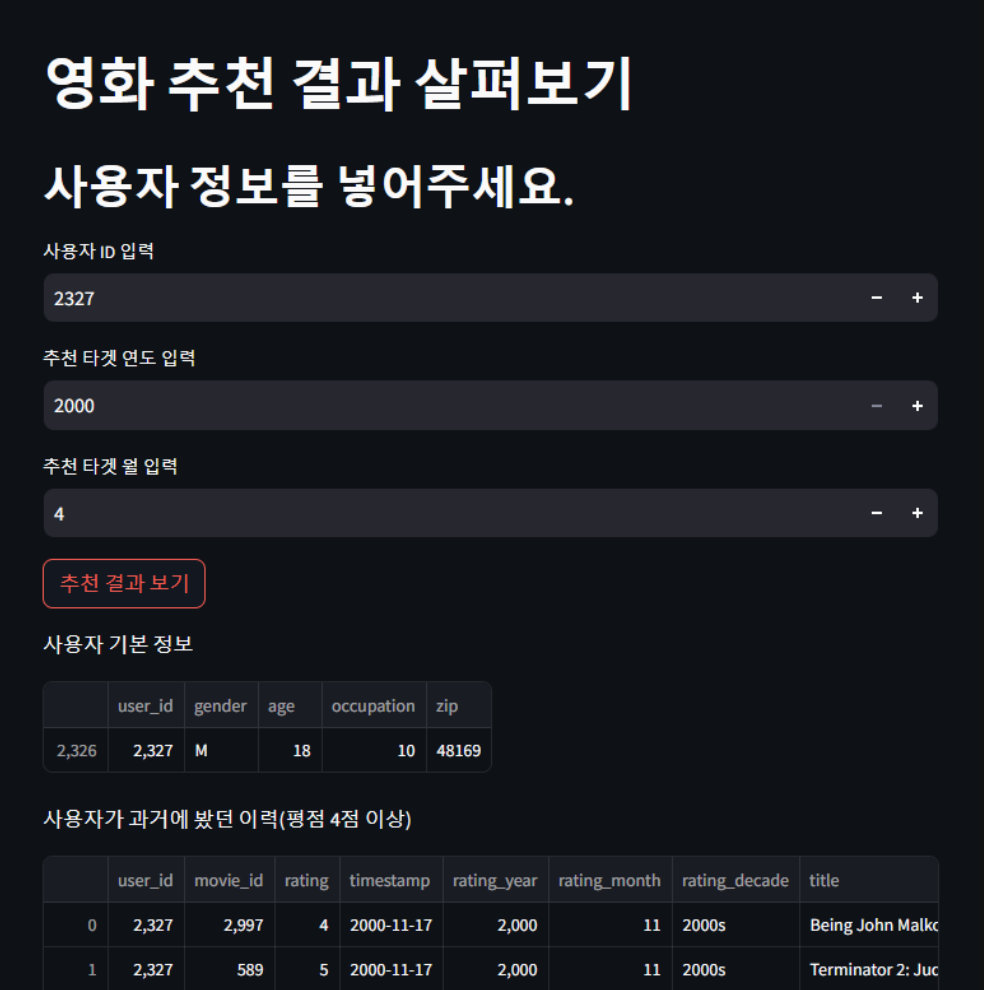

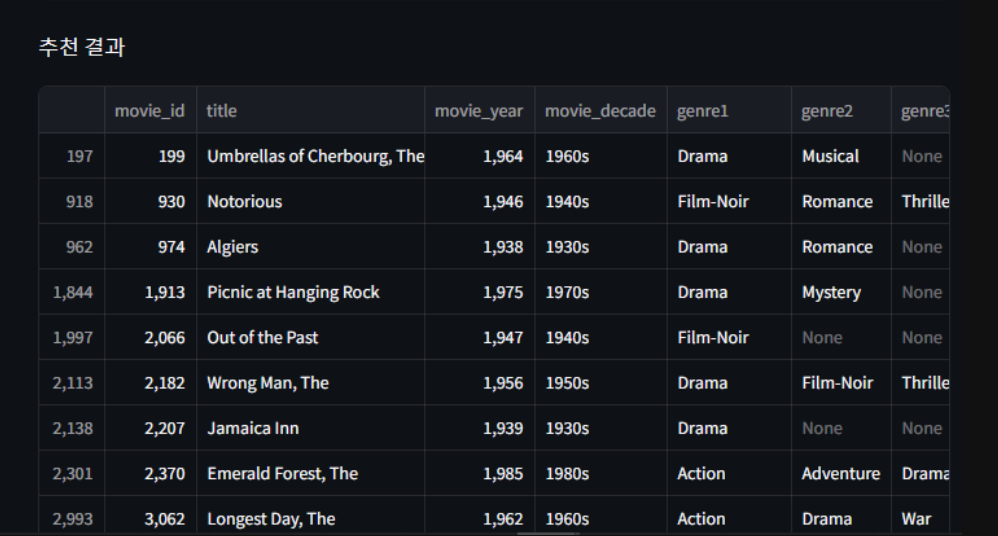

## 6. ÌîÑÎ°úÏ†ùÌä∏: AutoInt+ Î™®Îç∏ Íµ¨ÌòÑ Î∞è ÏãúÍ∞ÅÌôî

In [55]:
class AutoIntMLP(Layer): 
    def __init__(self, field_dims, embedding_size, att_layer_num=3, att_head_num=2, att_res=True, dnn_hidden_units=(32, 32), dnn_activation='relu',
                 l2_reg_dnn=0, l2_reg_embedding=1e-5, dnn_use_bn=False, dnn_dropout=0.4, init_std=0.0001):
        super(AutoIntMLP, self).__init__()
        self.embedding = FeaturesEmbedding(field_dims, embedding_size)
        self.num_fields = len(field_dims)
        self.embedding_size = embedding_size

        self.final_layer = Dense(1, use_bias=False, kernel_initializer=tf.random_normal_initializer(stddev=init_std))
        
        # DNN part
        self.dnn = MultiLayerPerceptron(self.embedding_size, dnn_hidden_units,
                           activation=dnn_activation, l2_reg=l2_reg_dnn, dropout_rate=dnn_dropout, use_bn=dnn_use_bn,
                           init_std=init_std, output_layer=True)
        
        # Multi-head Attention layer
        self.int_layers = [MultiHeadSelfAttention(att_embedding_size=embedding_size, head_num=att_head_num, use_res=att_res) for _ in range(att_layer_num)]


    def call(self, inputs):
        embed_x = self.embedding(inputs)
        dnn_embed = tf.reshape(embed_x, shape=(-1, self.embedding_size * self.num_fields))

        att_input = embed_x
        for layer in self.int_layers:
            att_input = layer(att_input)

        att_output = Flatten()(att_input)
        att_output = self.final_layer(att_output)
        
        dnn_output = self.dnn(dnn_embed)
        
        # Merge DNN & MHA output
        y_pred = tf.nn.sigmoid(att_output + dnn_output)
        
        return y_pred

In [80]:
# ÏóêÌè¨ÌÅ¨, ÌïôÏäµÎ•†, ÎìúÎ°≠ÏïÑÏõÉ, Î∞∞ÏπòÏÇ¨Ïù¥Ï¶à, ÏûÑÎ≤†Îî© ÌÅ¨Í∏∞ Îì± Î≥ÄÍ≤ΩÌïòÏó¨ Ï†ïÏùò
epochs=10
learning_rate= 0.001
dropout= 0.7
batch_size = 512
embed_dim= 256

In [81]:
class AutoIntMLPModel(Model):
    def __init__(self, field_dims, embedding_size, att_layer_num=3, att_head_num=2
                 , att_res=True, l2_reg_dnn=0, l2_reg_embedding=1e-5, dnn_use_bn=False
                 , dnn_dropout=0, init_std=0.0001):
        super(AutoIntMLPModel, self).__init__()
        self.autoInt_plus_layer = AutoIntMLP(field_dims, embedding_size, att_layer_num=att_layer_num, att_head_num=att_head_num, 
                                     att_res=att_res, l2_reg_dnn=l2_reg_dnn, dnn_dropout=dnn_dropout, init_std=init_std
                                    )

    def call(self, inputs, training=False):
        return self.autoInt_plus_layer(inputs, training=training)

In [82]:
# Î™®Îç∏ Ï†ïÏùò
autoInt_model = AutoIntModel(field_dims, embed_dim, att_layer_num=3, att_head_num=2, att_res=True,
                             l2_reg_dnn=0, l2_reg_embedding=1e-5, dnn_use_bn=False
                             , dnn_dropout=dropout, init_std=0.0001)

In [83]:
import keras
# ÏòµÌã∞ÎßàÏù¥Ï†Ä, Ïò§Ï∞®Ìï®Ïàò Ï†ïÏùò
optimizer = tf.keras.optimizers.Adam(
    learning_rate=learning_rate
)
loss_fn = BinaryCrossentropy(from_logits=False)

In [84]:
autoInt_model.compile(optimizer=optimizer, loss=loss_fn, metrics=['binary_crossentropy'])

In [85]:
history = autoInt_model.fit(train_df[u_i_feature + meta_features], train_df[label], epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/10
1407/1407 [==============================] - 64s 44ms/step - loss: 0.6454 - binary_crossentropy: 0.6454 - val_loss: 0.6336 - val_binary_crossentropy: 0.6336
Epoch 2/10
1407/1407 [==============================] - 60s 43ms/step - loss: 0.6309 - binary_crossentropy: 0.6309 - val_loss: 0.6314 - val_binary_crossentropy: 0.6314
Epoch 3/10
1407/1407 [==============================] - 60s 43ms/step - loss: 0.6361 - binary_crossentropy: 0.6361 - val_loss: 0.6463 - val_binary_crossentropy: 0.6463
Epoch 4/10
1407/1407 [==============================] - 59s 42ms/step - loss: 0.6509 - binary_crossentropy: 0.6509 - val_loss: 0.6470 - val_binary_crossentropy: 0.6470
Epoch 5/10
1407/1407 [==============================] - 59s 42ms/step - loss: 0.6419 - binary_crossentropy: 0.6419 - val_loss: 0.6383 - val_binary_crossentropy: 0.6383
Epoch 6/10
1407/1407 [==============================] - 59s 42ms/step - loss: 0.6394 - binary_crossentropy: 0.6394 - val_loss: 0.6394 - val_binary_crossentropy:

### ÌöåÍ≥†

1. Î∞∞Ïö¥ Ï†ê
- AutoInt Î™®Îç∏ÏùÑ ÌôúÏö©ÌïòÏó¨ Ï∂îÏ≤ú ÏãúÏä§ÌÖúÏùÑ Íµ¨ÌòÑÌïòÎäî Î∞©Î≤ïÏóê ÎåÄÌï¥ Î∞∞Ïõ†ÏäµÎãàÎã§. AutoIntÎäî Î©ÄÌã∞ Ìó§Îìú ÏÖÄÌîÑ Ïñ¥ÌÖêÏÖò Î©îÏª§ÎãàÏ¶òÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÌïÑÎìú Í∞ÑÏùò ÏÉÅÌò∏ÏûëÏö©ÏùÑ Ìö®Í≥ºÏ†ÅÏúºÎ°ú Ï∫°Ï≥êÌï† Ïàò ÏûàÎäî Î™®Îç∏ÏûÖÎãàÎã§.
- Ï∂îÏ≤ú ÏãúÏä§ÌÖúÏóêÏÑú ÏÇ¨Ïö©ÎêòÎäî Îã§ÏñëÌïú Îç∞Ïù¥ÌÑ∞ Ïú†Ìòï(Î™ÖÏãúÏ†Å Îç∞Ïù¥ÌÑ∞, ÏïîÎ¨µÏ†Å Îç∞Ïù¥ÌÑ∞)Í≥º Ïù¥Î•º ÌôúÏö©ÌïòÎäî Î∞©Î≤ïÏóê ÎåÄÌï¥ ÏïåÍ≤å ÎêòÏóàÏäµÎãàÎã§.
- Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Í≥ºÏ†ïÏóêÏÑú Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©Í≥º Ïõê-Ìï´ Ïù∏ÏΩîÎî©ÏùÑ Ï†ÅÏö©ÌïòÎäî Î∞©Î≤ïÍ≥º Í∑∏ Ï∞®Ïù¥Ï†êÏóê ÎåÄÌï¥ Ïù¥Ìï¥Ìï† Ïàò ÏûàÏóàÏäµÎãàÎã§.
- Ï∂îÏ≤ú ÏãúÏä§ÌÖúÏùò ÏÑ±Îä•ÏùÑ ÌèâÍ∞ÄÌïòÍ∏∞ ÏúÑÌïú ÏßÄÌëúÎ°ú NDCGÏôÄ ÌûàÌä∏Ïú®(Hit Rate)ÏùÑ ÏÇ¨Ïö©ÌïòÎäî Î∞©Î≤ïÏùÑ Î∞∞Ïõ†ÏäµÎãàÎã§.

2. Î∞úÏ†ÑÏãúÌÇ¨ Ï†ê

- AutoInt Î™®Îç∏ Ïô∏ÏóêÎèÑ Îã§ÏñëÌïú Ï∂îÏ≤ú ÏãúÏä§ÌÖú Î™®Îç∏(Ïòà: NCF, DeepFM Îì±)ÏùÑ ÏãúÎèÑÌï¥Î≥¥Í≥† ÎπÑÍµêÌï¥Î≥º Ïàò ÏûàÏäµÎãàÎã§. Í∞Å Î™®Îç∏Ïùò Ïû•Îã®Ï†êÏùÑ ÌååÏïÖÌïòÍ≥† Îç∞Ïù¥ÌÑ∞ÏÖãÏóê Ï†ÅÌï©Ìïú Î™®Îç∏ÏùÑ ÏÑ†ÌÉùÌïòÎäî Í≤ÉÏù¥ Ï§ëÏöîÌï©ÎãàÎã§.
- ÌòÑÏû¨Îäî Î™ÖÏãúÏ†Å Îç∞Ïù¥ÌÑ∞(ÌèâÏ†ê)Îßå ÏÇ¨Ïö©ÌïòÏòÄÏßÄÎßå, ÏïîÎ¨µÏ†Å Îç∞Ïù¥ÌÑ∞(ÌÅ¥Î¶≠ Ïó¨Î∂Ä, Íµ¨Îß§ Ïù¥Î†• Îì±)Î•º Ìï®Íªò ÌôúÏö©ÌïòÎäî Î∞©Î≤ïÏùÑ Í≥†Î†§Ìï¥Î≥º Ïàò ÏûàÏäµÎãàÎã§. Ïù¥Î•º ÌÜµÌï¥ ÏÇ¨Ïö©ÏûêÏùò ÏÑ†Ìò∏ÎèÑÎ•º ÎçîÏö± Ï†ïÌôïÌûà ÌååÏïÖÌï† Ïàò ÏûàÏùÑ Í≤ÉÏûÖÎãàÎã§.
- ÏΩúÎìú Ïä§ÌÉÄÌä∏ Î¨∏Ï†ú(ÏÉàÎ°úÏö¥ ÏÇ¨Ïö©ÏûêÎÇò ÏïÑÏù¥ÌÖúÏóê ÎåÄÌïú Ï∂îÏ≤úÏùò Ïñ¥Î†§ÏõÄ)Î•º Ìï¥Í≤∞ÌïòÍ∏∞ ÏúÑÌïú Î∞©Î≤ïÏùÑ Ïó∞Íµ¨Ìï¥Î≥º Ïàò ÏûàÏäµÎãàÎã§. ÏΩòÌÖêÏ∏† Í∏∞Î∞ò ÌïÑÌÑ∞ÎßÅÏù¥ÎÇò Î©îÌÉÄ Îç∞Ïù¥ÌÑ∞Î•º ÌôúÏö©ÌïòÎäî Îì±Ïùò Ï†ëÍ∑º Î∞©ÏãùÏùÑ Í≥†Î†§Ìï¥Î≥º Ïàò ÏûàÏäµÎãàÎã§.